# Employer Project: the Bank of England


## Table of Contents

<p>
<h3>

[1. Introduction](#1.-Introduction)

[2. Data Collection & Preprocessing](#2.-Data-Collection-&-Preprocessing)

[3. Data Analysis](#3.-Data-Analysis)
    
[4. Insights & Recommendations](#4.-Insights-&-Recommendations)
 
</h3>
</p>


## 1. Introduction

The client for this project is the Bank of England. Here is an excerpt from the project briefing, profiling the Bank:

> The Bank of England's mission is to promote the good of the people of the United Kingdom by maintaining monetary and financial stability. The Bank of England plays a multifaceted role in the national economy. Its primary objectives include maintaining price stability and supporting the government’s economic policies. To achieve this, the Bank has control over monetary policy instruments, primarily the setting of interest rates. By altering interest rates, the Bank can influence borrowing costs for businesses and individuals, which in turn affects spending, investment, and inflation. 

More information about the Bank of England can be found [here.](https://www.bankofengland.co.uk/about)


The scenario for this project, as outlined in the briefing, is as follows: 

> Part of the job of the Bank of England is to provide reassurance and stability to financial markets. One way this is achieved is through representatives of the Bank delivering speeches at various public events. As an organisation, the Bank of England is interested in how the trends in these speeches correlate with observed events and economic indicators, as well as how the sentiment of these speeches can be used to predict market behaviour. This analysis will inform our understanding of the impact of the Bank’s communications on the economy, as well as the predictive power of using this data set.

### 1.1 Business Questions

To provide insight into the above, The Bank of England's Data Strategy & Implementation Division needs answers to the following questions:

1. Has the sentiment of central bank speeches changed over time? If so, how has it changed?
<br>
<br>
2. How does the sentiment of the Bank of England’s speeches correlate with key events such as:
    * bank rate decisions (including direction/magnitude of the change)
    * publication of the Monetary Policy Report
    * publication of the  Financial Stability Report/Review
    * any other events or trends that may be relevant or interesting?  
<br>
<br>
3. How does the sentiment of speeches correlate with key economic indicators of the UK, such as:
    * GDP growth
    * inflation
    * labour market statistics (e.g. unemployment and wages)
    * any other economic indicators that may be relevant or interesting.
<br>   
<br>
4. Do these speeches have any predictive power to assist in predicting market behaviour?
<br>
<br>
5.  Are there other insights or findings from the analysis that may be of interest to the organisation?
<br>
<br>
6.  What are the potential reasons for any of the correlations discovered above? How have you drawn these conclusions?

The goal of the project was to answer each of these questions and present key insights and recommendations to The Bank of England.  


## 2. Data Collection & Preprocessing


### 2.1 Getting the Data


#### Data for Natural Language Processing

* `all_speeches.csv`: this is a [publically-available Kaggle dataset](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) comprised of a corpus of speeches from senior central bankers of various influential central banks. This corpus covers the period from 1997 until 2022 and was provided to the team as part of the project briefing
<br>
<br>
* `LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist.xlsx`: a list of words labelled with sentiment, provided along with the project brief
<br>
<br>
* In addition, the team scraped the most recent Bank of England speeches from the [Bank of England web pages]( https://www.bankofengland.co.uk/news/speeches ) (88 speeches in total). For the code used for scraping and preprocessing of this data set, please see accompanying workbook `BoE-NLP-Preprocessing.ipynb`


#### Bank of England Data

* `mpcvoting.xlsx`: a record of voting decisions by the Bank of England in relation to Bank Rate (6th Jun 1997-1st Feb 2024), Stock of Government Bond Purchases (4th Aug 2016-21st Sep 2023), Stock of Corporate Bond Purchases (4th Aug 2016-3rd Feb 2022) and Asset Purchase Decisions (5th Mar 2009-4th Aug 2016).  Each of the tabs was cleaned and preprocessed- see section 2.2 below
<br>
<br>
* Links were also provided to publicly-available Bank of England reports: the ['Monetary Policy Reports'](https://www.bankofengland.co.uk/monetary-policy-report/monetary-policy-report)  and ['Financial Stability Reports'](https://www.bankofengland.co.uk/financial-stability-report/financial-stability-reports). Publication dates for these were scraped from the Bank of England web pages.The code for this is provided in a separate Notebook (`Scraping_Report_Dates.ipynb`). 


#### Office for National Statistics (OfS) and Other Economic Indicators

* Links to publicly-available data-sets related to [GDP Growth](https://www.ons.gov.uk/economy/grossdomesticproductgdp), [Inflation and Price Indices](https://www.ons.gov.uk/economy/inflationandpriceindices) and [Labour Market Statistics](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/uklabourmarket/previousReleases) were provided as part of the briefing. The team chose to focus on the following: 
  * NOMIS Economic Activity Data: data was taken from [here](https://www.nomisweb.co.uk/query/construct/summary.asp?mode=construct&version=0&dataset=59)
  * ONS Vacancies Data: link [here](https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/datasets/vacanciesandunemploymentvacs01)
  * ONS GDP Data: link [here](https://www.ons.gov.uk/economy/grossdomesticproductgdp/datasets/monthlygdpandmainsectorstofourdecimalplaces)
  * ONS CPI and CPIH Monthly Indices: link [here](https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/consumerpriceinflation)
  * ONS Average Weekly Earnings Data: The data are from the ONS Dataset X09: Real average weekly earnings using consumer price inflation (seasonally adjusted). The data are from the 12 March 2024 edition. Please note that ASHE only goes back to 2000.


#### Financial Market Indicators

The team identified the following market indicators to explore in relation to speech sentiment- links to where the data was downloaded from is provided:

* Exchange rate: data was taken from [here](https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?Travel=NIxAZxSUx&FromSeries=1&ToSeries=50&DAT=RNG&FD=1&FM=Jan&FY=2021&TD=31&TM=Dec&TY=2025&FNY=Y&CSVF=TT&html.x=66&html.y=26&SeriesCodes=XUDLBK67&UsingCodes=Y&Filter=N&title=XUDLBK67&VPD=Y) 
* Gilt yield: link [here](https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?Travel=NIxAZxSUx&FromSeries=1&ToSeries=50&DAT=RNG&FD=1&FM=Jan&FY=2018&TD=7&TM=Jun&TY=2023&FNY=Y&CSVF=TT&html.x=66&html.y=26&SeriesCodes=IUDMNPY&UsingCodes=Y&Filter=N&title=IUDMNPY&VPD=Y)
* FTSE 100: link [here](https://www.wsj.com/market-data/quotes/index/UK/UKX/historical-prices)
* SONIA Index: link [here](https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?Travel=NIx&ShadowPage=1&SearchText=sonia&SearchExclude=&SearchTextFields=TC&Thes=&SearchType=&Cats=&ActualResNumPerPage=&TotalNumResults=12&XNotes2=Y&C=5JK&ShowData.x=41&ShowData.y=34)
* Quoted household interest rates: link [here](https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?travel=nixazxsux&fromseries=1&toseries=50&dat=rng&fd=1&fm=jan&fy=2010&td=11&tm=may&ty=2025&fny=y&csvf=tt&html.x=66&html.y=26&seriescodes=iumbv34&usingcodes=y&filter=n&title=iumbv34&vpd=y)


Please note that the only input files required to run this notebook are:

* `daily_processed_V3.0.csv`
* `monthly_processed_V3.0.csv`

### 2.2 Preprocessing the Data

Please see separate notebooks for all of the preprocessing code and output files, all of which are provided as part of the assignment submission: 

* `BoE-NLP-Preprocessing.ipynb`: scraping of speeches, preprocessing of NLP classifiers
* `BoE_MPCVoting_Preprocessing.ipynb`: all preprocessing of provided Bank of England data
* `Economic_indicators_Preprocessing.ipynb`: all preprocessing of ONS and other economic indicators
* `Financial market indicators_Preprocessing`: all preprocessing of financial market indicators



### 2.3 Combining the Datasets

All required preprocessed data was combined: please see the separate notebook `Combining_Datasets.ipynb`.

Some of the preprocessed data had monthly dates, whereas some had daily dates. As such, the team made the decision to combine these into two separate files, `daily_processed_V3.0.csv` and `monthly_processed_V3.0.csv`. The metadata for these is as follows:

In [1]:
# Importing libraries that we will use

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
daily = pd.read_csv('daily_processed_v3.0.csv')
# to focus our analysis on other economic indicators we decided to drop the bond stock indicators:
daily= daily.drop(['MPC_StockGovtBond','MPC_StockCorpBond','MPC_BondStock',  'MPC_BondStock', 'MPC_PreviousBondStock','MPC_BondStock_Change','MPC_QEDec'],axis=1)
daily.head()

,EffectiveERI,EERI_Change,GiltYield,GiltYield_Change,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,FTSE_%Change,FTSE_Change,...,vader_summary,textblob_summary,lm_summary,dovish-hawkish_summary,finbert_summary,MPR_date,MonetaryPolicyReport,FSR_date,FinancialStabilityReport,ref_day
0,99.9015,0.0507,6.3126,-0.0118,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-02
1,100.5286,0.6271,6.1600,-0.1526,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-05
2,100.5170,-0.0116,6.1203,-0.0397,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-06
3,100.0816,-0.4354,6.1176,-0.0027,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-07
4,99.4477,-0.6339,6.0786,-0.0390,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-08


In [3]:
daily.shape

(6787, 72)

| **Column**             | **Description**                                                                                                                                |
|:--- |:--- |
|EffectiveERI |Effective exchange rate index, Sterling (Jan 2005 = 100)  |
| EERI_Change |Change in EERI from previous day  |
| GiltYield                 |Yield from British Government Securities, 10 year nominal par yield  |
| GiltYield_Change               | Change in Gilt Yield from previous day  |
| FTSE_Price                | FTSE 100 opening price that day  |
| FTSE_Open                | Speech reference number  |
| FTSE_High                 | FTSE 100 highest price that day  |
|FTSE_Low                 | FTSE 100 lowest price that day  |
| FTSE_%Change                | FTSE 100 % difference in opening price from previous day |
| FTSE_Change                | FTSE 100 difference in opening price from previous day  |
| SONIA                 | Daily sterling overnight index average rate  |
| MPC_PreviousRate | Rate set at previous meeting      |
| MPC_RateDecided | Rate set at the meeting|
| MPC_RateDecision| Overall decision (as string): 'Increase', 'Stay' or 'Decrease' |
| MPC_RateChange| Computed column showing difference from previous rate set|
| MPC_VotedIncrease|Calculated column based on number of members who voted to increase the rate |
| MPC_VotedStay | Calculated column based on number of members who voted to keep the rate the same    |
| MPC_VotedDecrease  | Calculated column based on number of members who voted to decrease the rate|
| MPC_PropVotedIncRate  | For each meeting proportion who voted to increase the rate. 1 = all voted increase, 0.5 = half voted increase, 0 = none vote increase|
| MPC_PropVotedDecRate | For each meeting proportion who voted to decrease the rate. 1 = all voted decrease, 0.5 = half voted decrease, 0 = none vote decrease |
|MPC_PropVotedStayRate | For each meeting proportion who voted to keep the rate the same ('stay'). 1 = all voted stay, 0.5 = half voted stay, 0 = none vote stay  |
| MPC_DecisionStrength | Returns the relevant proportion so if decision is to increase returns PropVotedIncRate |
| reference                 | Speech reference number  |
| country                    | Country where speech was made |
| title | Title of speech |
| author         | Who wrote the speech     |
| is_gov             | 1= The person making the speech was a governor; 0= was not a governor |
| text               | The text of the speech          |
| string_len              | Number of characters in speech|
| formatted_text               | Formatted text- check with Val how |
| vader_neg | Vader negative sentiment score |
| vader_neu | Vader neutral sentiment score  |
| vader_pos | Vader positive sentiment score  |
| vader_compound | Vader compound sentiment score  |
| textblob_polarity | TextBlob polarity score  |
| textblob_subjectivity | Vader neutral sentiment score  |
| lm_num_filtered_tokens | Filtered tokens for lm classifier|
| lm_num_negative |  The columns prefixed by 'lm_num' contain the count of tokens per sentiment in the speech.This is the Lm negative sentiment score. Negative = words with bad connotations (e.g. "indict", "abandon", "default")  |
| lm_negative_ratio | The columns suffixed by 'ratio' contain the count of tokens per sentiment in the speech divided by the total number of tokens in the speech. This is the Lm negative ratio  |
| lm_num_positive | Lm positive sentiment score. Positive = words with good connotations (e.g. "best", "accomplish", "innovativeness") |
| lm_positive_ratio | Lm positive ratio  |
| lm_num_uncertainty | Lm uncertainty score. Uncertainity = words indicating imprecision (e.g. "approximate", "almost", "contingency")|
| lm_uncertainty_ratio | Lm uncertainty ratio  |
| lm_num_litigious | Lm litigious score. Litigious = litigation-related words (e.g. "claimant", "tort", "absolves")|
| lm_litigious_ratio | Lm litigious ratio  |
| lm_num_strong | Lm strong sentiment score. Strong modal = words expressing certainty of an action (e.g. "always", "definitely", "never")|
| lm_strong_ratio | Lm strength ratio  |
| lm_num_weak | Lm weak sentiment score. Weak modal = words expressing uncertainty of an action (e.g. "almost", "could", "might")|
| lm_weak_ratio | Lm weak ratio  |
| lm_num_constraining | Lm constraining sentiment score. Constraining = words related to constraints (e.g. "required", "obligations", "commit")  |
| lm_constraining_ratio | Lm constraining ratio  |
| dovish-hawkish-polarity| The dovish-hawkish-polarity column computes polarity per speech: (sum Dovish - sum Hawkish) / (sum Dovish + sum Hawkish)  |
| dovish-hawkish-subjectivity | The dovish-hawkish-subjectity column computes subjectivity per speech: (sum Dovish + sum Hawkish) / (sum Dovish + sum Hawkish + sum Neutral)|
| finbert_pos |FinBERT positive sentiment score  |
| finbert_neg |FinBERT negative sentiment score  |
| finbert_neu |FinBERT neutral sentiment score  |
| finbert_polarity |FinBERT polarity score  |
| finbert_subjectivity |FinBERT subjectivity score  |
| vader_polarity | Vader polarity score  |
| vader_subjectivity | Vader subjectivity score  |
| lm_polarity | The lm_polarity column computes (lm_num_positive - lm_num_negative) / (lm_num_positive + lm_num_negative) |
| lm_subjectivity | The lm_subjectivity column computes (lm_num_positive + lm_num_negative) / lm_num_filtered_tokens  |
| vader_summary | Vader summary score  |
| textblob_summary | Textblob summary score  |
| lm_summary | Lm summary score  |
| dovish-hawkish_summary| Dovish-Hawkish summary score|
| finbert_summary| The FinBERT summary score |
| MPR_date| Date the 'Monetary Policy Report' was published |
| MonetaryPolicyReport| Title and date of 'Monetary Policy Report' (as text) |
| FSR_date| Date the 'Financial Stability Report' was published|
| FinancialStabilityReport| Title and date of 'Financial Stability Report' (as text) |
| ref_day| Date (day)  |





A note on the 'summary scores':

Explanation: if a speech is for the most part neutral (80% neutral, 20% subjective), the part that is subjective is 100% positive (or hawkish), so we have:
  * polarity = 1 (because 100% of the subjective part is positive)
  * subjectivity = 0.2 (only 20% of the speech is either positive or negative)
  * summary = 1 multiplied by 0.2 = 0.2

In [4]:
monthly = pd.read_csv('monthly_processed_v3.0.csv')
#dropping bond columns here for now- perhaps something that can be added to the preprocessing?
monthly= monthly.drop(['MPC_StockGovtBond','MPC_StockCorpBond','MPC_BondStock'],axis=1)
monthly.head()

,ref_month,EffectiveERI,GiltYield,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,SONIA,MPC_RateDecided,MPC_VotedIncrease,...,MonetaryPolicyReport,FinancialStabilityReport,UnEmp_Rate,Vacancies(000s),UnEmp/Vacancy,GDP,CPIH,CPI,AWE_Real_2015,QHIR_2yrFR75%LTV
0,Jan 1998,100.218457,6.097843,0.0,0.0,0.0,0.0,7.267890,0.0725,3.0,...,0.0,0.0,0.039812,0.0,0.0,66.0175,70.376,70.254,0.0,0.0
1,Feb 1998,99.940455,6.046065,0.0,0.0,0.0,0.0,7.340630,0.0725,4.0,...,0.0,0.0,0.039638,0.0,0.0,66.5757,70.584,70.498,0.0,0.0
2,Mar 1998,101.628773,5.992009,0.0,0.0,0.0,0.0,7.403314,0.0725,4.0,...,0.0,0.0,0.039412,0.0,0.0,66.4070,70.769,70.700,0.0,0.0
3,Apr 1998,101.898125,5.824855,0.0,0.0,0.0,0.0,7.251850,0.0725,3.0,...,0.0,0.0,0.039239,0.0,0.0,66.9183,71.206,71.072,0.0,0.0
4,May 1998,98.748600,5.864805,0.0,0.0,0.0,0.0,7.259563,0.0725,1.0,...,0.0,1.0,0.039235,0.0,0.0,66.7035,71.545,71.449,0.0,0.0


In [5]:
monthly.shape

(315, 61)

| **Column**             | **Description**                                                                                                                                |
|:--- |:--- |
|ref_month |Date (month)  |
|EffectiveERI |Effective exchange rate index, Sterling (Jan 2005 = 100)  |
| GiltYield                 |Yield from British Government Securities, 10 year nominal par yield  |
| FTSE_Price                | FTSE 100 opening price that day  |
| FTSE_Open                | Speech reference number  |
| FTSE_High                 | FTSE 100 highest price that day  |
|FTSE_Low                 | FTSE 100 lowest price that day  |
| SONIA                 | Daily sterling overnight index average rate  |
| MPC_RateDecided | Rate set at the meeting|
| MPC_VotedIncrease|Calculated column based on number of members who voted to increase the rate |
| MPC_VotedStay | Calculated column based on number of members who voted to keep the rate the same    |
| MPC_VotedDecrease  | Calculated column based on number of members who voted to decrease the rate|
| vader_neg | Vader negative sentiment score |
| vader_neu | Vader neutral sentiment score  |
| vader_pos | Vader positive sentiment score  |
| vader_compound | Vader compound sentiment score  |
| textblob_polarity | TextBlob polarity score  |
| textblob_subjectivity | Vader neutral sentiment score  |
| lm_num_filtered_tokens | Filtered tokens for lm classifier|
| lm_num_negative |  The columns prefixed by 'lm_num' contain the count of tokens per sentiment in the speech.This is the Lm negative sentiment score. Negative = words with bad connotations (e.g. "indict", "abandon", "default")  |
| lm_negative_ratio | The columns suffixed by 'ratio' contain the count of tokens per sentiment in the speech divided by the total number of tokens in the speech. This is the Lm negative ratio  |
| lm_num_positive | Lm positive sentiment score. Positive = words with good connotations (e.g. "best", "accomplish", "innovativeness") |
| lm_positive_ratio | Lm positive ratio  |
| lm_num_uncertainty | Lm uncertainty score. Uncertainity = words indicating imprecision (e.g. "approximate", "almost", "contingency")|
| lm_uncertainty_ratio | Lm uncertainty ratio  |
| lm_num_litigious | Lm litigious score. Litigious = litigation-related words (e.g. "claimant", "tort", "absolves")|
| lm_litigious_ratio | Lm litigious ratio  |
| lm_num_strong | Lm strong sentiment score. Strong modal = words expressing certainty of an action (e.g. "always", "definitely", "never")|
| lm_strong_ratio | Lm strength ratio  |
| lm_num_weak | Lm weak sentiment score. Weak modal = words expressing uncertainty of an action (e.g. "almost", "could", "might")|
| lm_weak_ratio | Lm weak ratio  |
| lm_num_constraining | Lm constraining sentiment score. Constraining = words related to constraints (e.g. "required", "obligations", "commit")  |
| lm_constraining_ratio | Lm constraining ratio  |
| lm_polarity | The lm_polarity column computes (lm_num_positive - lm_num_negative) / (lm_num_positive + lm_num_negative) |
| lm_subjectivity | The lm_subjectivity column computes (lm_num_positive + lm_num_negative) / lm_num_filtered_tokens  |
| dovish-hawkish-polarity| The dovish-hawkish-polarity column computes polarity per speech: (sum Dovish - sum Hawkish) / (sum Dovish + sum Hawkish)  |
| dovish-hawkish-subjectivity | The dovish-hawkish-subjectity column computes subjectivity per speech: (sum Dovish + sum Hawkish) / (sum Dovish + sum Hawkish + sum Neutral)|
| finbert_pos |FinBERT positive sentiment score  |
| finbert_neg |FinBERT negative sentiment score  |
| finbert_neu |FinBERT neutral sentiment score  |
| finbert_polarity |FinBERT polarity score  |
| finbert_subjectivity |FinBERT subjectivity score  |
| vader_polarity | Vader polarity score  |
| vader_subjectivity | Vader subjectivity score  |
| vader_summary | Vader summary score  |
| textblob_summary | Textblob summary score  |
| lm_summary | Lm summary score  |
| dovish-hawkish_summary| The dovish-hawish summary score |
| finbert_summary| The FinBERT summary score |
| MonetaryPolicyReport| Title and date of 'Monetary Policy Report' (as text) |
| FinancialStabilityReport| Title and date of 'Financial Stability Report' (as text) |
| UnEmp_Rate| Umemployment rate  |
| Vacancies(000s)| Job vacancies  |
| UnEmp/Vacancy| Number of job vacancies  |
|GDP| GDP figure  |
|CPIH| CPIH rate  |
| CPI| CPI rate  |
| AWE_Real_2015|Real average weekly earnings using CPI, total pay, seasonally adjusting in 2015 prices (£) |
| QHIR_2yrFR75%LTV| Monthly interest rate of UK monetary financial institutions (excl. Central Bank) sterling 2 year (75% LTV) fixed rate mortgage to households (in percent) not seasonally adjusted   |





## 3. Data Analysis

### 3.1 Selecting Which Sentiment Scores to Use to Answer the Questions

We were interested in exploring which of the classifiers would be best to use for exploring the relationship with the economic and financial indicators. 

Vader, LM, TextBlob and finbert classifier scores reflect the tone of the speech irrespective of the monetary stance, while the Dovish-hawkish classifer scores reflect the monetary stance from extremely dovish (1) to extremely hawkish (-1) analysis (please note that we flipped this for the visualisations below, as we felt that for the client it would make more intuitive sense for hawkish to = 1 and dovish to = -1).

First, we ran a function that would allow us to easily review the most interesting correlations (the code for this function was taken from [Yatharth Ranjan' GitHub)](https://gist.github.com/yatharthranjan):

In [6]:
# function to easily review correlations
def get_top_correlations_blog(df, threshold=0.4):
    """
    df: the dataframe to get correlations from
    threshold: the maximum and minimum value to include for correlations. For eg, if this is 0.4, only pairs haveing a correlation coefficient greater than 0.4 or less than -0.4 will be included in the results. 
    """
    orig_corr = df.corr()
    c = orig_corr.abs()

    so = c.unstack()

    print("|    Variable 1    |    Variable 2    | Correlation Coefficient    |")
    print("|------------------|------------------|----------------------------|")
    
    i=0
    pairs=set()
    result = pd.DataFrame()
    for index, value in so.sort_values(ascending=False).iteritems():
        # Exclude duplicates and self-correlations
        if value > threshold \
        and index[0] != index[1] \
        and (index[0], index[1]) not in pairs \
        and (index[1], index[0]) not in pairs:
            
            print(f'|    {index[0]}    |    {index[1]}    |    {orig_corr.loc[(index[0], index[1])]}    |')
            result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
            pairs.add((index[0], index[1]))
            i+=1
    return result.reset_index(drop=True).set_index(['Variable 1', 'Variable 2'])

In [7]:
# changing the date column to datetime data type:

monthly['ref_month'] = pd.to_datetime(monthly['ref_month'])
monthly.head()

,ref_month,EffectiveERI,GiltYield,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,SONIA,MPC_RateDecided,MPC_VotedIncrease,...,MonetaryPolicyReport,FinancialStabilityReport,UnEmp_Rate,Vacancies(000s),UnEmp/Vacancy,GDP,CPIH,CPI,AWE_Real_2015,QHIR_2yrFR75%LTV
0,1998-01-01,100.218457,6.097843,0.0,0.0,0.0,0.0,7.267890,0.0725,3.0,...,0.0,0.0,0.039812,0.0,0.0,66.0175,70.376,70.254,0.0,0.0
1,1998-02-01,99.940455,6.046065,0.0,0.0,0.0,0.0,7.340630,0.0725,4.0,...,0.0,0.0,0.039638,0.0,0.0,66.5757,70.584,70.498,0.0,0.0
2,1998-03-01,101.628773,5.992009,0.0,0.0,0.0,0.0,7.403314,0.0725,4.0,...,0.0,0.0,0.039412,0.0,0.0,66.4070,70.769,70.700,0.0,0.0
3,1998-04-01,101.898125,5.824855,0.0,0.0,0.0,0.0,7.251850,0.0725,3.0,...,0.0,0.0,0.039239,0.0,0.0,66.9183,71.206,71.072,0.0,0.0
4,1998-05-01,98.748600,5.864805,0.0,0.0,0.0,0.0,7.259563,0.0725,1.0,...,0.0,1.0,0.039235,0.0,0.0,66.7035,71.545,71.449,0.0,0.0


In [8]:
daily['ref_day'] = pd.to_datetime(daily['ref_day'])
daily.head()

,EffectiveERI,EERI_Change,GiltYield,GiltYield_Change,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,FTSE_%Change,FTSE_Change,...,vader_summary,textblob_summary,lm_summary,dovish-hawkish_summary,finbert_summary,MPR_date,MonetaryPolicyReport,FSR_date,FinancialStabilityReport,ref_day
0,99.9015,0.0507,6.3126,-0.0118,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-02
1,100.5286,0.6271,6.1600,-0.1526,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-05
2,100.5170,-0.0116,6.1203,-0.0397,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-06
3,100.0816,-0.4354,6.1176,-0.0027,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-07
4,99.4477,-0.6339,6.0786,-0.0390,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-08


In [9]:
#Creating a column where dovish-hawkish is flipped: this will help visuals make more sense intuitively:

monthly['dovish-hawkish-polarity_flipped'] = - monthly['dovish-hawkish-polarity']
monthly['dovish-hawkish-summary_flipped'] = - monthly['dovish-hawkish_summary']

In [10]:
daily['dovish-hawkish-polarity_flipped'] = - daily['dovish-hawkish-polarity']
daily['dovish-hawkish-summary_flipped'] = - daily['dovish-hawkish_summary']

### 3.2 Sense Check of Correlations Between Summaries of the Various Classifiers

In [11]:
# retrieve list of column names with 'summary' in the name
col_summaries = [c for c in daily.columns if 'summary' in c]
print (col_summaries)
collist = col_summaries

['vader_summary', 'textblob_summary', 'lm_summary', 'dovish-hawkish_summary', 'finbert_summary', 'dovish-hawkish-summary_flipped']


In [12]:
daily_small = daily[~pd.isnull(daily['reference'])][collist]

In [13]:
daily_small.head()

,vader_summary,textblob_summary,lm_summary,dovish-hawkish_summary,finbert_summary,dovish-hawkish-summary_flipped
177,0.011011,0.036248,-0.018325,-0.564259,-0.292752,0.564259
203,0.088000,0.028285,-0.002398,0.163910,0.111231,-0.163910
204,0.039000,0.036115,-0.022951,0.560575,-0.712115,-0.560575
212,0.024000,0.023064,-0.022418,-0.026583,-0.042285,0.026583
213,0.037037,0.041333,-0.015138,0.000000,-0.067966,-0.000000


In [14]:
daily_small= daily_small.drop(['dovish-hawkish_summary'],axis=1)

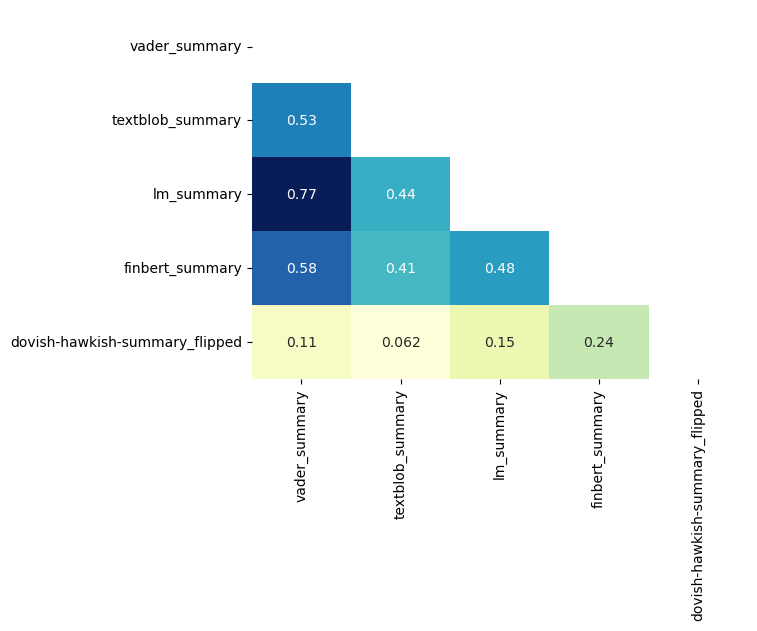

In [15]:
# plotting correlation heatmap 
matrix = np.triu(daily_small.corr())
dataplot = sns.heatmap(daily_small.corr(), cmap="YlGnBu", annot=True,mask=matrix, cbar=False) 

# displaying heatmap 
plt.show() 

In [16]:
get_top_correlations_blog(daily_small, 0.3)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    lm_summary    |    vader_summary    |    0.767648156094702    |
|    vader_summary    |    finbert_summary    |    0.5849202269604388    |
|    vader_summary    |    textblob_summary    |    0.5332813237589755    |
|    lm_summary    |    finbert_summary    |    0.4765543175730438    |
|    textblob_summary    |    lm_summary    |    0.43681621535661674    |
|    textblob_summary    |    finbert_summary    |    0.40857531575846356    |


C:\Users\Owner\AppData\Local\Temp\ipykernel_15996\3147320479.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in so.sort_values(ascending=False).iteritems():


Correlation Coefficient
Variable 1       Variable 2                               
lm_summary       vader_summary                    0.767648
vader_summary    finbert_summary                  0.584920
                 textblob_summary                 0.533281
lm_summary       finbert_summary                  0.476554
textblob_summary lm_summary                       0.436816
                 finbert_summary                  0.408575

Next, we will check the distributions of each of the classifiers:

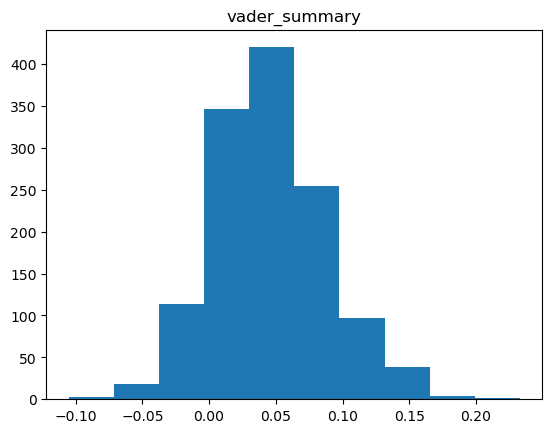

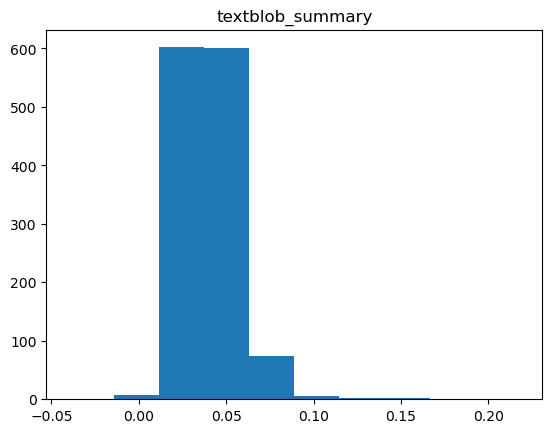

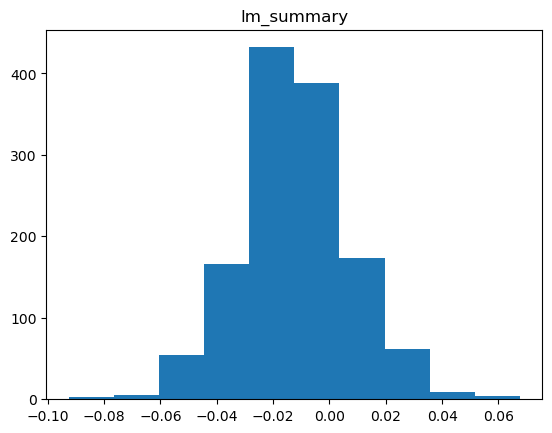

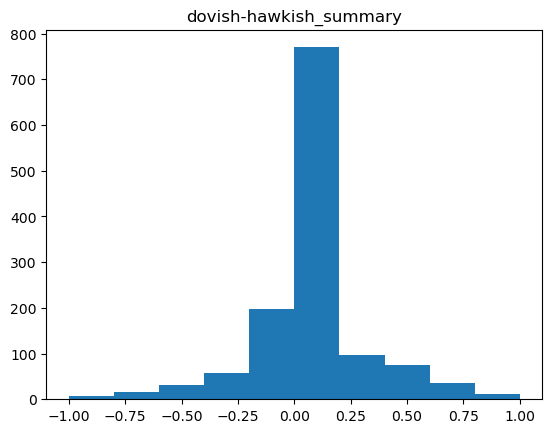

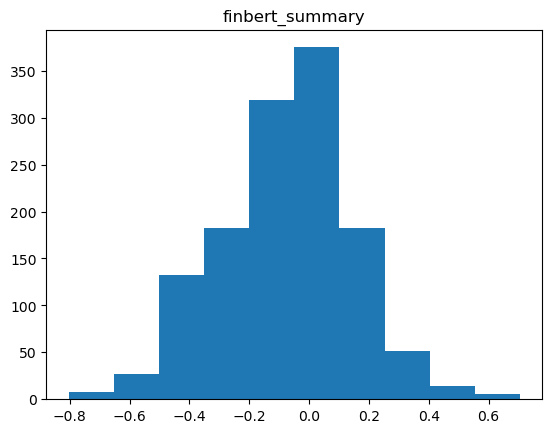

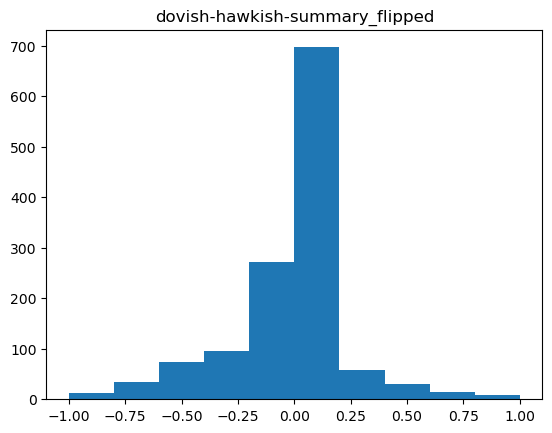

In [17]:
for c in collist:
    plt.hist(daily[c])
    plt.title(c)
    plt.show()

### 3.3 Conclusions

* LM and Vader are highly correlated
* Finbert and Vader are highly correlated
* Vader and TextBlob are somewhat correlated
* Finbert and LM are somewhat correlated
* LM and TextBlob are somewhat correlated
* TextBlob and Finbert are somewhat correlated
* Dovish-Hawkish is not correlated to any of the other classifiers
* There are various distribution shapes for all classifiers

The team concluded that the best classifiers to focus on in the analyis were:

* lm_summary (one of the classifiers proposed as part of the project brief)
* finbert_summary (a more sophisticated classifier that is only somewhat correlated with lm)
* dovish-hawkish-summary_flipped as this would give an alternative insight into sentiment reflecting the monetary stance

In this section, we carry out the analysis to answer each of the business questions in turn, using the above joined datasets.

### 3.4 Has The Sentiment Of Central Bank Speeches Changed Over Time? If So, How Has It Changed?


First, let's visualise the sentiment scores for all three classifiers over time:

In [18]:
# Aggregating by quarter to make for a clearer visualization:
quaterly = monthly.groupby(pd.PeriodIndex(monthly['ref_month'], freq="Q"))[['dovish-hawkish-summary_flipped', 'lm_summary', 'finbert_summary']].mean()


In [19]:
quaterly.reset_index(inplace=True)

In [20]:
quaterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype        
---  ------                          --------------  -----        
 0   ref_month                       105 non-null    period[Q-DEC]
 1   dovish-hawkish-summary_flipped  105 non-null    float64      
 2   lm_summary                      105 non-null    float64      
 3   finbert_summary                 105 non-null    float64      
dtypes: float64(3), period[Q-DEC](1)
memory usage: 3.4 KB


In [21]:
quaterly['Quarter'] = pd.to_datetime(quaterly['ref_month'].dt.strftime('%b %Y'))

First, the LM classifier:

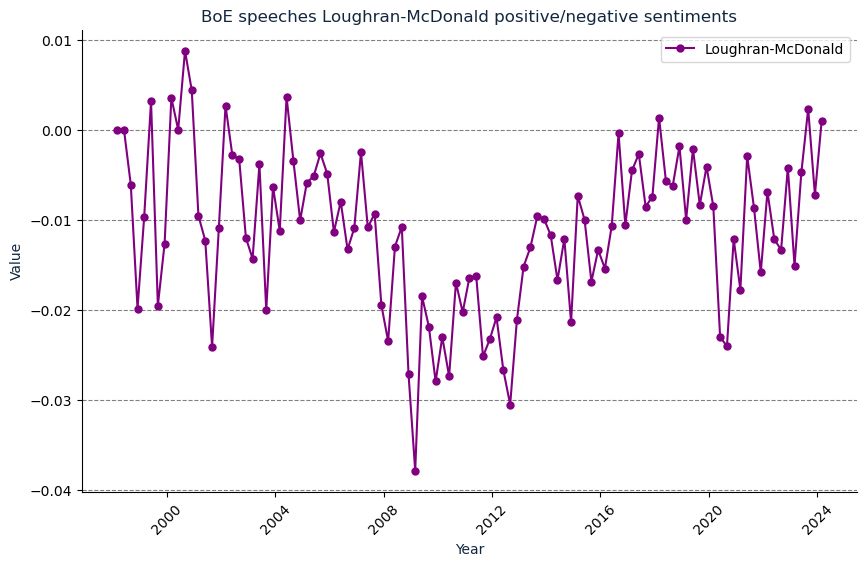

In [22]:
# Loughran-McDonald
plt.figure(figsize=(10,6))
plt.plot(quaterly['Quarter'], quaterly['lm_summary'], color='purple', marker='o', markersize=5, label='Loughran-McDonald')
plt.xlabel('Year', color='#12273F')
plt.ylabel('Value', color='#12273F')
plt.title('BoE speeches Loughran-McDonald positive/negative sentiments', color='#12273F')
plt.grid(axis='y', linestyle='--', color='grey')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.legend()

plt.show()

Finally, finBert:

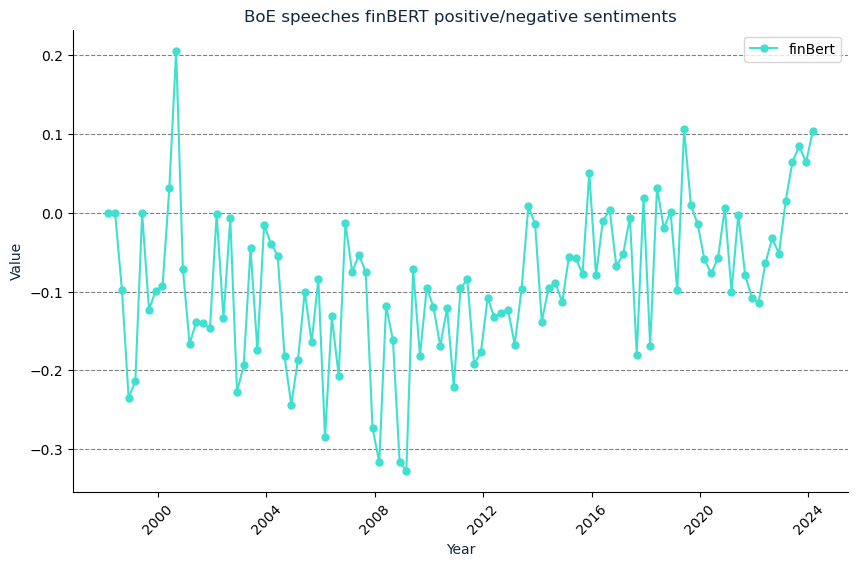

In [23]:
# finBert
plt.figure(figsize=(10,6))
plt.plot(quaterly['Quarter'], quaterly['finbert_summary'], color='turquoise', marker='o', markersize=5, label='finBert')
plt.xlabel('Year', color='#12273F')
plt.ylabel('Value', color='#12273F')
plt.title('BoE speeches finBERT positive/negative sentiments', color='#12273F')
plt.grid(axis='y', linestyle='--', color='grey')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.legend()

plt.show()

We will use the 'flipped' dovish-hawkish column, as this makes for a more intuitive visualisation (where hawkish = 1 and dovish ia -1):

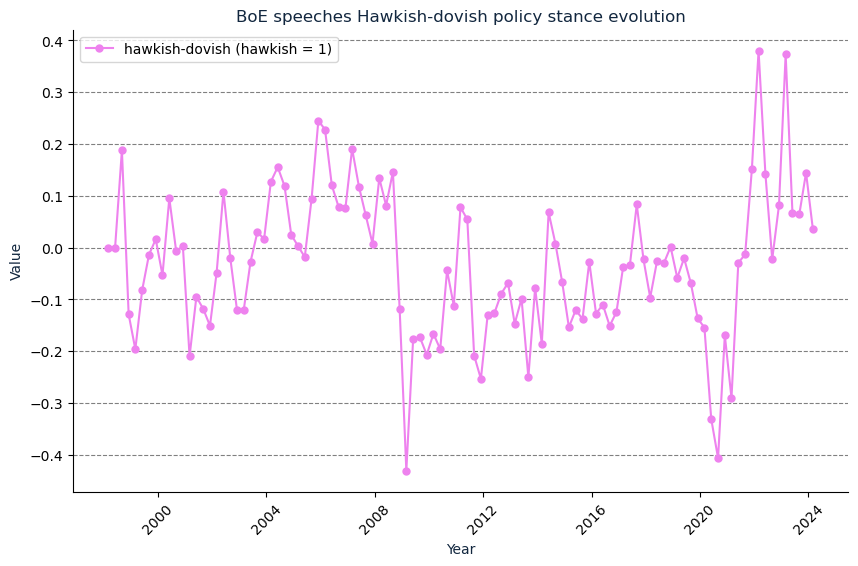

In [24]:
# Hawkish-dovish
plt.figure(figsize=(10,6))

plt.plot(quaterly['Quarter'], quaterly['dovish-hawkish-summary_flipped'], color='violet', marker='o', markersize=5, label='hawkish-dovish (hawkish = 1)')

plt.xlabel('Year', color='#12273F')
plt.ylabel('Value', color='#12273F')
plt.title('BoE speeches Hawkish-dovish policy stance evolution', color='#12273F')
plt.grid(axis='y', linestyle='--', color='grey')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.legend()

plt.show()

Next, we visualise these trends as boxplots, aggregated by months: this gives us a view of the monthly variation in sentiment, as well as the trends over time:

In [25]:
monthly['ref_year'] = pd.DatetimeIndex(monthly['ref_month']).year

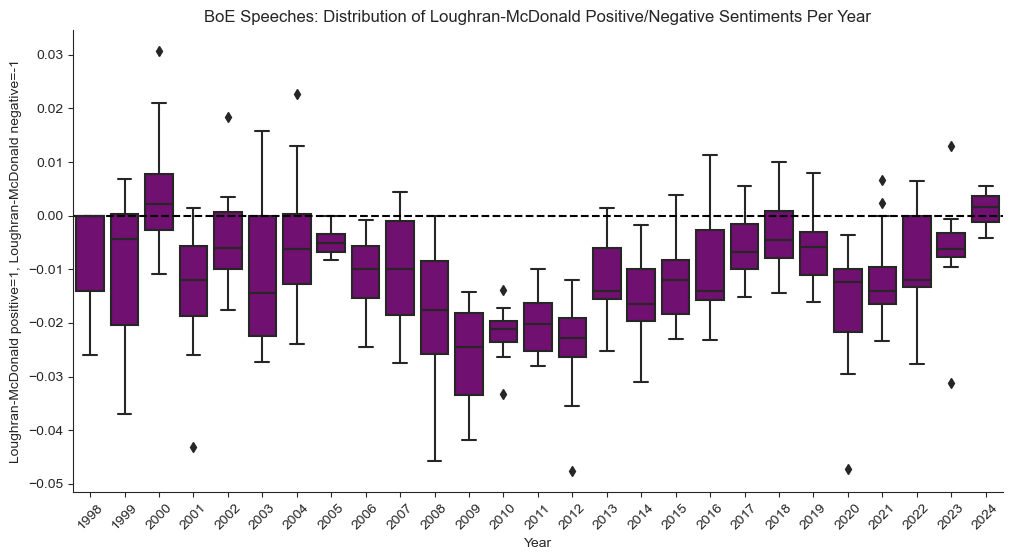

In [26]:
sns.set_style("ticks")
plt.figure(figsize=(12, 6))

sns.boxplot(x='ref_year', y='lm_summary', data=monthly, color='purple')
plt.title('BoE Speeches: Distribution of Loughran-McDonald Positive/Negative Sentiments Per Year')
plt.xlabel('Year')
plt.ylabel('Loughran-McDonald positive=1, Loughran-McDonald negative=-1')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.show()

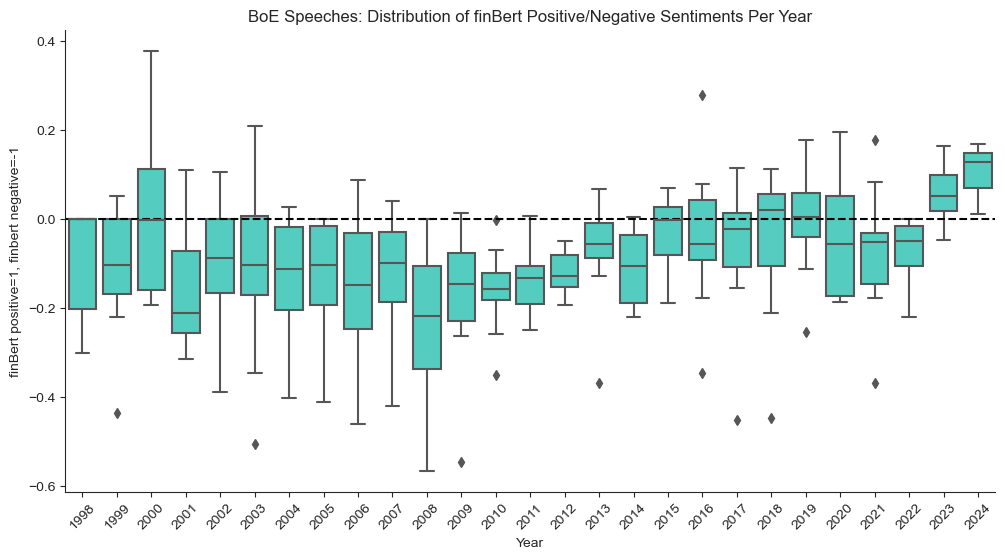

In [27]:
sns.set_style("ticks")
plt.figure(figsize=(12, 6))

sns.boxplot(x='ref_year', y='finbert_summary', data=monthly, color='turquoise')
plt.title('BoE Speeches: Distribution of finBert Positive/Negative Sentiments Per Year')
plt.xlabel('Year')
plt.ylabel('finBert positive=1, finbert negative=-1')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.show()

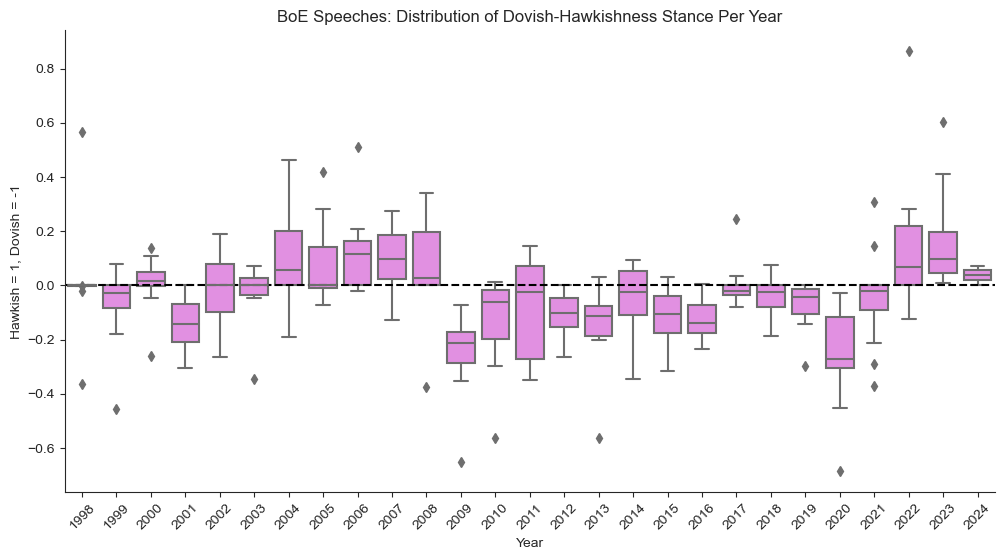

In [28]:
sns.set_style("ticks")
plt.figure(figsize=(12, 6))
sns.boxplot(x='ref_year', y='dovish-hawkish-summary_flipped', data=monthly, color='violet')
plt.title('BoE Speeches: Distribution of Dovish-Hawkishness Stance Per Year')
plt.xlabel('Year')
plt.ylabel('Hawkish = 1, Dovish = -1')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.show()

### Conclusions to question 1: 


* The LM sentiments do fluctuation over time, but with a very small range between 0.01 and < -0.04
* The FinBert scores fluctuate a little more over time, but still only within the range of 0.2 to c. -0.3
* The Dovish-Hawishness summary scores fluctuate more over time from 0.4 to -0.4


### 3.5 How Does The Sentiment Of The Bank Of England’s Speeches Correlate With Bank Rate Decisions, Publication of Reports, Key Economic Indicators and Financial Market Indicators?




To investigate this, we will first look at the correlations between the sentiment classifiers and the various indicators:

### 3.5.1 Correlations with Bank Rate Decisions

In [29]:
boe_heatmap_dataframe=monthly[['MPC_RateDecided','MPC_VotedIncrease', 'MPC_VotedStay', 'MPC_VotedDecrease' ,'lm_summary','finbert_summary','dovish-hawkish-summary_flipped']]

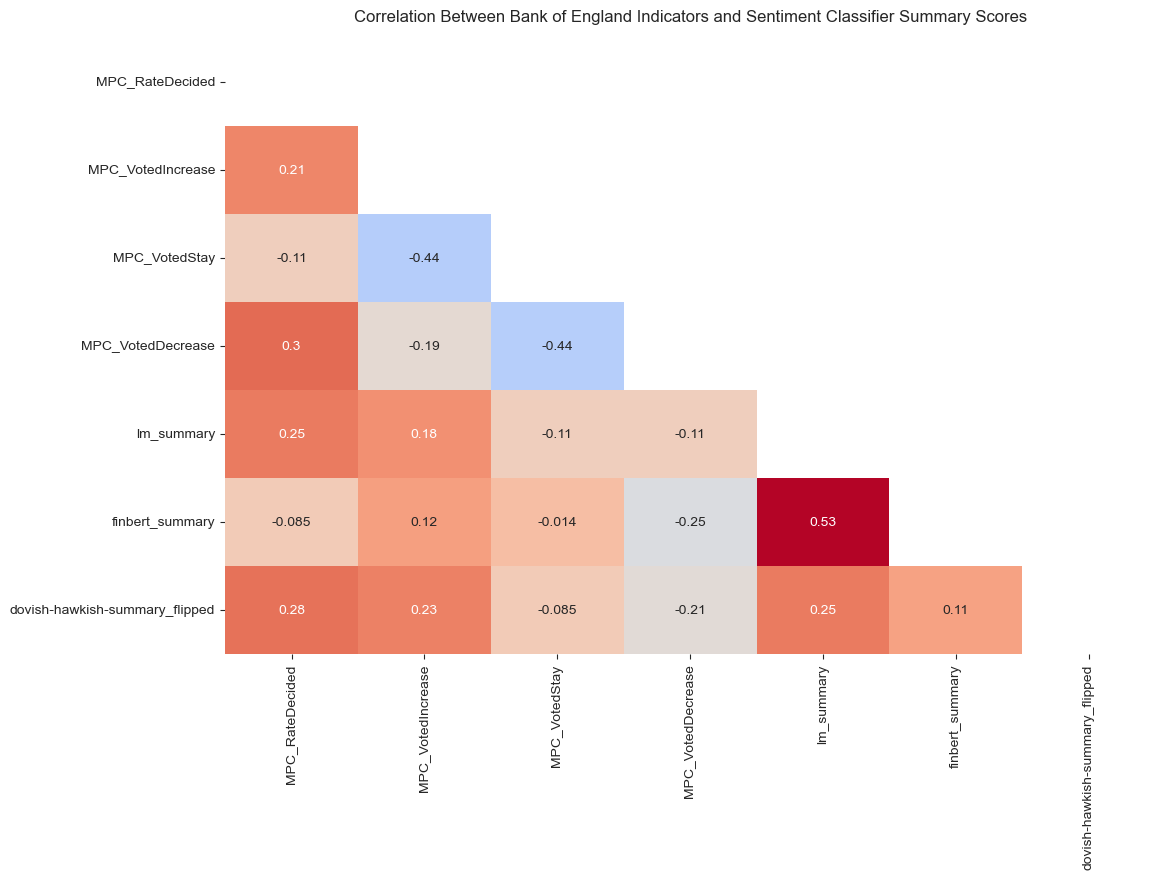

In [30]:
plt.figure(figsize=(12, 8))

matrix = np.triu(boe_heatmap_dataframe.corr())

heatmap = sns.heatmap(boe_heatmap_dataframe.corr(), annot=True,cmap='coolwarm', vmin=-1,mask=matrix,cbar=False)

heatmap.set_title('Correlation Between Bank of England Indicators and Sentiment Classifier Summary Scores', fontdict={'fontsize':12}, pad=12);


Using the defined get_top_correlations() function to provide us with the most correlated relationships:

In [31]:
get_top_correlations_blog(boe_heatmap_dataframe, 0.24)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    finbert_summary    |    lm_summary    |    0.5255740023274917    |
|    MPC_VotedIncrease    |    MPC_VotedStay    |    -0.44162258063289866    |
|    MPC_VotedStay    |    MPC_VotedDecrease    |    -0.43752509941760126    |
|    MPC_RateDecided    |    MPC_VotedDecrease    |    0.3030729061267884    |
|    dovish-hawkish-summary_flipped    |    MPC_RateDecided    |    0.2783982854152544    |
|    finbert_summary    |    MPC_VotedDecrease    |    -0.2510710155488175    |
|    MPC_RateDecided    |    lm_summary    |    0.247014868242207    |
|    dovish-hawkish-summary_flipped    |    lm_summary    |    0.2461350288469605    |


C:\Users\Owner\AppData\Local\Temp\ipykernel_15996\3147320479.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in so.sort_values(ascending=False).iteritems():


,,Correlation Coefficient
Variable 1,Variable 2,
finbert_summary,lm_summary,0.525574
MPC_VotedIncrease,MPC_VotedStay,-0.441623
MPC_VotedStay,MPC_VotedDecrease,-0.437525
MPC_RateDecided,MPC_VotedDecrease,0.303073
dovish-hawkish-summary_flipped,MPC_RateDecided,0.278398
finbert_summary,MPC_VotedDecrease,-0.251071
MPC_RateDecided,lm_summary,0.247015
dovish-hawkish-summary_flipped,lm_summary,0.246135


The most promising relationships between classifiers and bank rate decision metrics are:

* dovish-hawkish_summary and MPC_RateDecided (0.28)
* finbert_summary and MPC_VotedDecrease (-0.25)
* lm_summary and MPC_RateDecided (0.25)

### 3.5.2 Correlations with Publication of Reports

Next, we will look at whether there is any discernable relationship between sentiment and the publication dates of Monetary Policy Reports and Financial Stability Reports. First, we will look at the correlations:

In [32]:
reports_heatmap_dataframe=monthly[['MonetaryPolicyReport','FinancialStabilityReport','lm_summary','finbert_summary','dovish-hawkish-summary_flipped']]

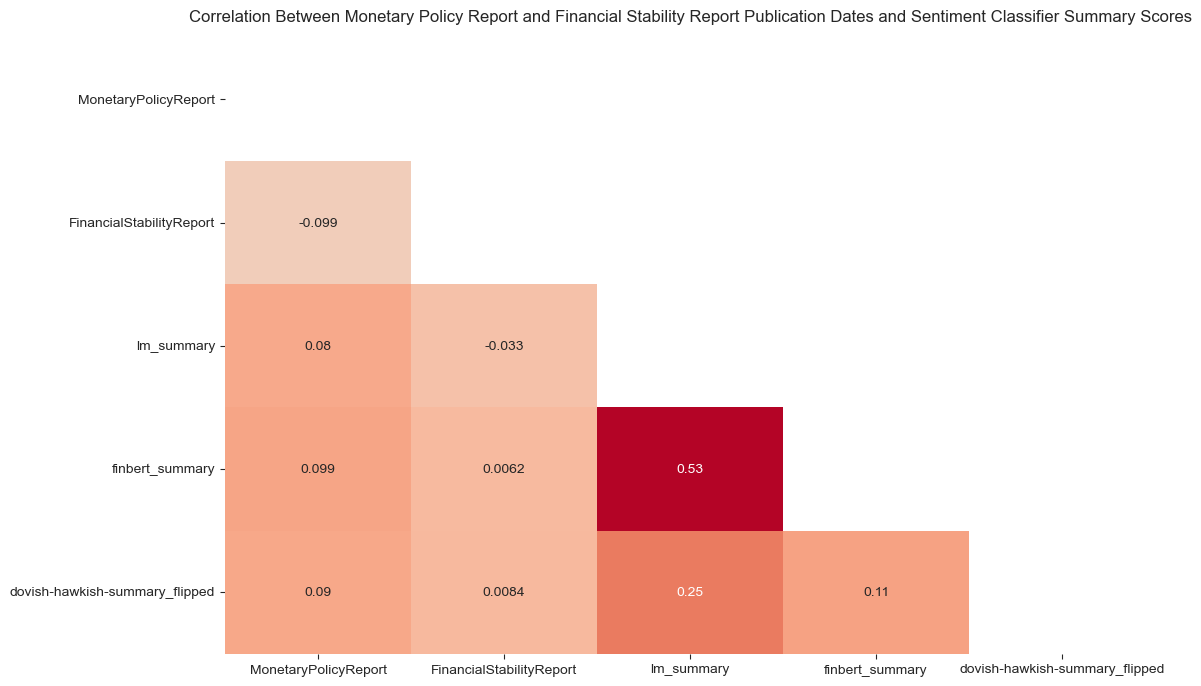

In [33]:
plt.figure(figsize=(12, 8))

matrix = np.triu(reports_heatmap_dataframe.corr())

heatmap = sns.heatmap(reports_heatmap_dataframe.corr(), annot=True,cmap='coolwarm', vmin=-1,mask=matrix,cbar=False)

heatmap.set_title('Correlation Between Monetary Policy Report and Financial Stability Report Publication Dates and Sentiment Classifier Summary Scores', fontdict={'fontsize':12}, pad=12);

In [34]:
get_top_correlations_blog(reports_heatmap_dataframe, 0.25)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    lm_summary    |    finbert_summary    |    0.5255740023274917    |


C:\Users\Owner\AppData\Local\Temp\ipykernel_15996\3147320479.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in so.sort_values(ascending=False).iteritems():


,,Correlation Coefficient
Variable 1,Variable 2,
lm_summary,finbert_summary,0.525574


We can see that there is virtually no correlation between sentiment and publication of these reports. We can visualise this to illustrate the point, using the dovish-hawkish classfier for this purpose:

In [35]:
import datetime

In [36]:
# we only have monetary policy reports from 2019 onwards, so we need to compare with only those dates::

monthly_post2019 = monthly[monthly['ref_month'] >= '2020-01-01'].copy()

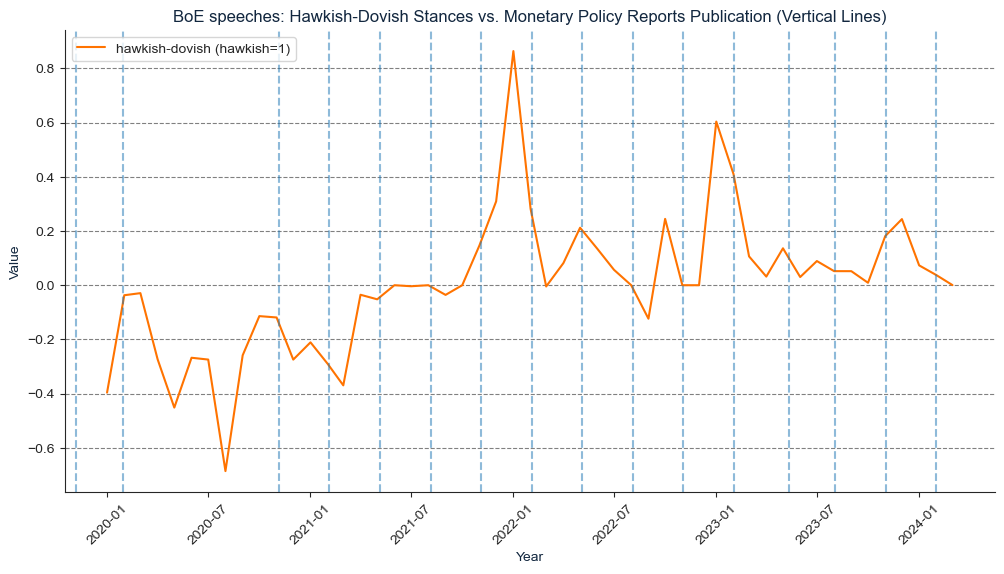

In [37]:
plt.figure(figsize=(12,6))

plt.plot(monthly_post2019 ['ref_month'], monthly_post2019 ['dovish-hawkish-summary_flipped'], 
         color='#FF7300', label='hawkish-dovish (hawkish=1)')

plt.xlabel('Year', color='#12273F')
plt.ylabel('Value', color='#12273F')
plt.title('BoE speeches: Hawkish-Dovish Stances vs. Monetary Policy Reports Publication (Vertical Lines)', color='#12273F')
plt.grid(axis='y', linestyle='--', color='grey')

for i in daily[daily['MonetaryPolicyReport'].notnull()]['ref_day']:
    plt.axvline(x = (i- datetime.datetime(1970,1,1)).days, linestyle = '--', alpha = 0.5)
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.legend()

plt.show()

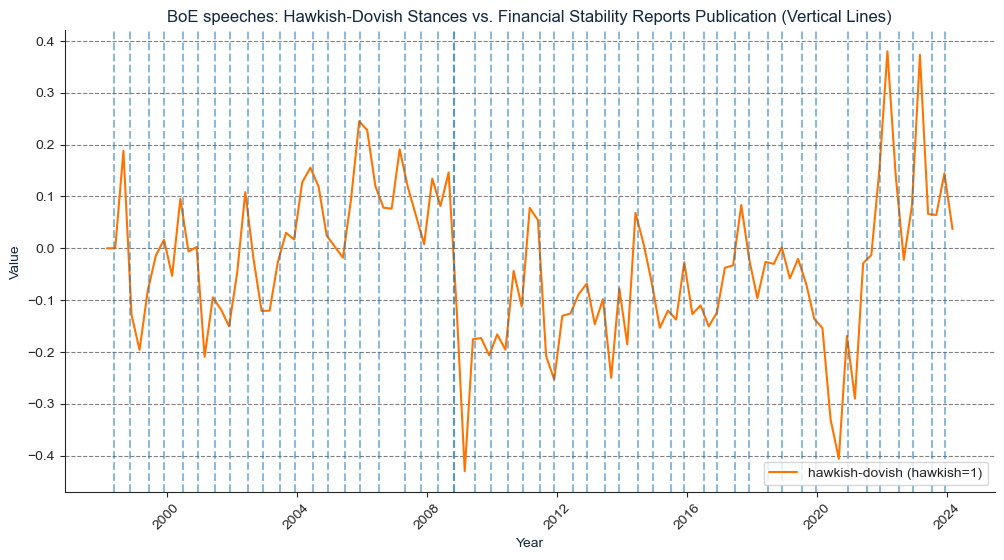

In [38]:
plt.figure(figsize=(12,6))

plt.plot(quaterly ['Quarter'], quaterly ['dovish-hawkish-summary_flipped'], 
         color='#FF7300', label='hawkish-dovish (hawkish=1)'
         )

plt.xlabel('Year', color='#12273F')
plt.ylabel('Value', color='#12273F')
plt.title('BoE speeches: Hawkish-Dovish Stances vs. Financial Stability Reports Publication (Vertical Lines)', color='#12273F')
plt.grid(axis='y', linestyle='--', color='grey')

for i in daily[daily['FinancialStabilityReport'].notnull()]['ref_day']:
    plt.axvline(x = (i- datetime.datetime(1970,1,1)).days, linestyle = '--', alpha = 0.5)
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.legend()

plt.show()

The visualisations above illustrate that there does not appear to be a discernible relationship between the fact of there being a report published (Monetary Policy Reports or Financial Stability Reports) and the dovish-hawkish classifier summary sentiment. There was also no discernible relationship with the other classifiers we looked at.

### 3.5.3 Correlations with Key Economic Indicators

Next, we will look at how sentiment correlates with the various economic indicators:

In [39]:
eco_heatmap_dataframe=monthly[['GDP','CPIH','CPI','AWE_Real_2015','Vacancies(000s)','UnEmp_Rate' ,'lm_summary','finbert_summary','dovish-hawkish-summary_flipped']]

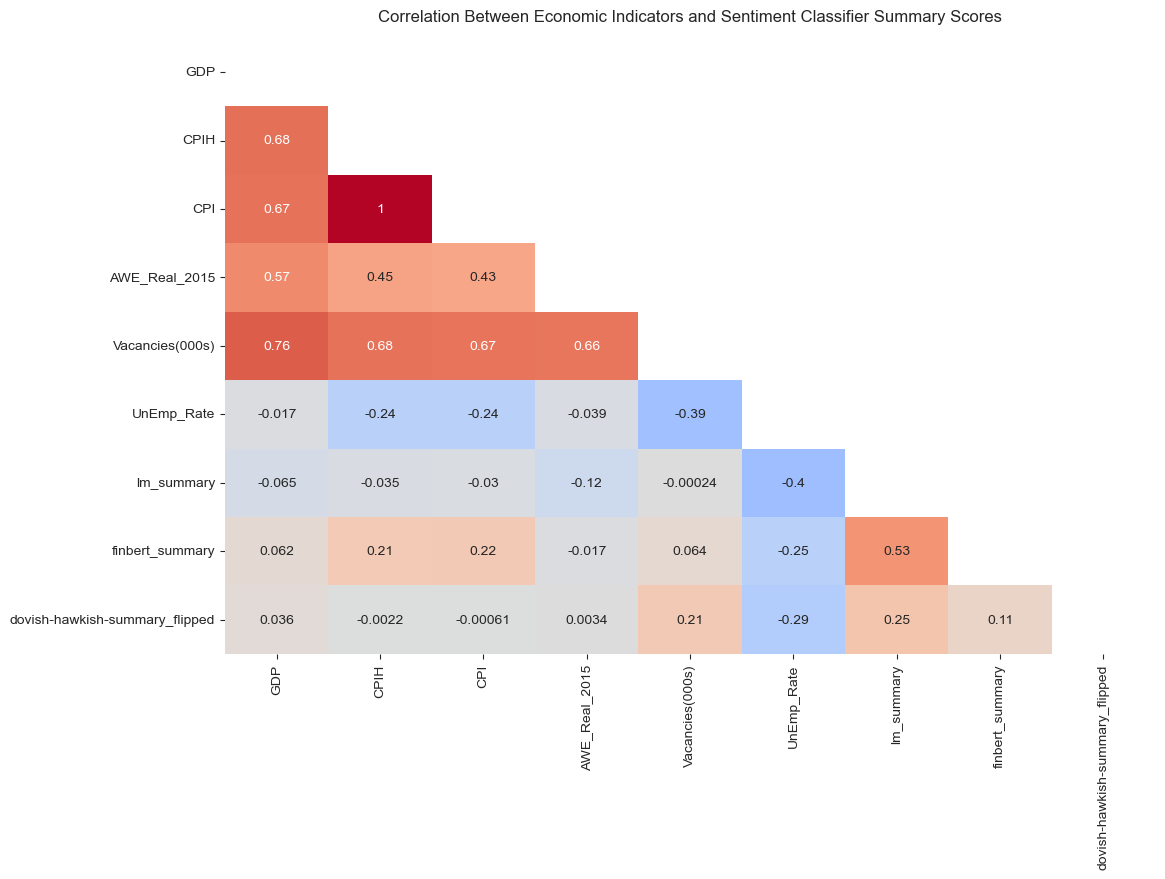

In [40]:
plt.figure(figsize=(12, 8))

matrix = np.triu(eco_heatmap_dataframe.corr())

heatmap = sns.heatmap(eco_heatmap_dataframe.corr(), annot=True,cmap='coolwarm', vmin=-1,mask=matrix,cbar=False)

heatmap.set_title('Correlation Between Economic Indicators and Sentiment Classifier Summary Scores', fontdict={'fontsize':12}, pad=12);


In [41]:
get_top_correlations_blog(eco_heatmap_dataframe, 0.25)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    CPIH    |    CPI    |    0.9994605189899274    |
|    GDP    |    Vacancies(000s)    |    0.7618403887806899    |
|    CPIH    |    GDP    |    0.6812034893229996    |
|    CPIH    |    Vacancies(000s)    |    0.6783698050626907    |
|    CPI    |    GDP    |    0.6727601546294713    |
|    Vacancies(000s)    |    CPI    |    0.6700355440661098    |
|    Vacancies(000s)    |    AWE_Real_2015    |    0.6594997356563198    |
|    AWE_Real_2015    |    GDP    |    0.5738033461499307    |
|    finbert_summary    |    lm_summary    |    0.5255740023274917    |
|    AWE_Real_2015    |    CPIH    |    0.4491674307879721    |
|    CPI    |    AWE_Real_2015    |    0.43029857755695267    |
|    lm_summary    |    UnEmp_Rate    |    -0.4044735103488754    |
|    UnEmp_Rate    |    Vacancies(000s)    |    -0.38766680386210656    |
|    UnEmp_Rate    |    d

C:\Users\Owner\AppData\Local\Temp\ipykernel_15996\3147320479.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in so.sort_values(ascending=False).iteritems():


Correlation Coefficient
Variable 1      Variable 2                                             
CPIH            CPI                                            0.999461
GDP             Vacancies(000s)                                0.761840
CPIH            GDP                                            0.681203
                Vacancies(000s)                                0.678370
CPI             GDP                                            0.672760
Vacancies(000s) CPI                                            0.670036
                AWE_Real_2015                                  0.659500
AWE_Real_2015   GDP                                            0.573803
finbert_summary lm_summary                                     0.525574
AWE_Real_2015   CPIH                                           0.449167
CPI             AWE_Real_2015                                  0.430299
lm_summary      UnEmp_Rate                                    -0.404474
UnEmp_Rate      Vacancies(000s)                               -0.387667
                dovish-hawkish-summary_flipped                -0.285417

The most promising relationships between classifiers and economic indicators here are:

* lm_summary and UnEmp_Rate (-0.40)
* dovish_hawkish_summary and UnEmp_Rate (-0.29)

### 3.5.4 Correlations with Financial Market Indicators

Finally, we will look at the correlations with the financial market indicators:

In [42]:
finance_heatmap_dataframe=monthly[['GiltYield','FTSE_Price','SONIA','QHIR_2yrFR75%LTV', 'EffectiveERI','lm_summary','finbert_summary','dovish-hawkish-summary_flipped']]

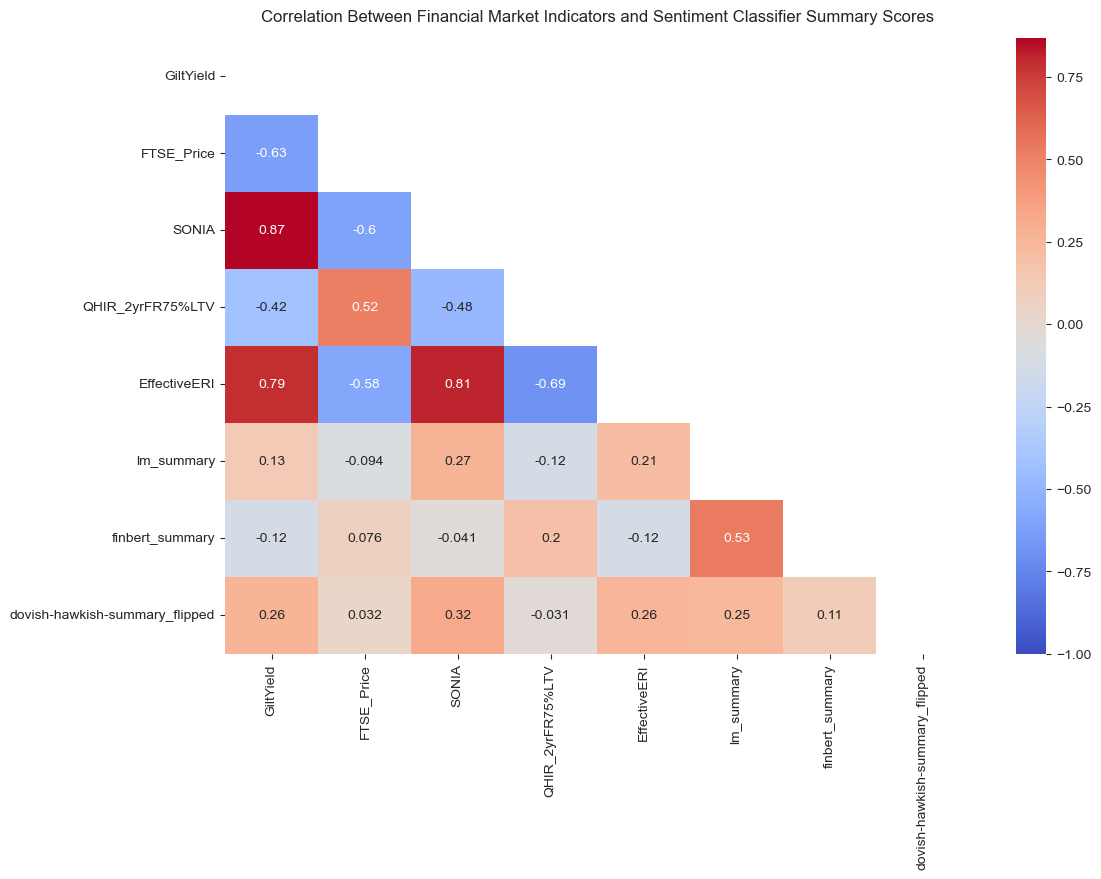

In [43]:
matrix = np.triu(finance_heatmap_dataframe.corr())

plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(finance_heatmap_dataframe.corr(), annot=True,cmap='coolwarm', vmin=-1,mask=matrix)

heatmap.set_title('Correlation Between Financial Market Indicators and Sentiment Classifier Summary Scores', fontdict={'fontsize':12}, pad=12);


In [44]:
get_top_correlations_blog(finance_heatmap_dataframe, 0.25)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    SONIA    |    GiltYield    |    0.8678999221065252    |
|    EffectiveERI    |    SONIA    |    0.8142373779040573    |
|    GiltYield    |    EffectiveERI    |    0.7920447243821861    |
|    EffectiveERI    |    QHIR_2yrFR75%LTV    |    -0.6908572133491507    |
|    FTSE_Price    |    GiltYield    |    -0.6277355464965418    |
|    FTSE_Price    |    SONIA    |    -0.5990675542515501    |
|    EffectiveERI    |    FTSE_Price    |    -0.5806852540985539    |
|    lm_summary    |    finbert_summary    |    0.5255740023274917    |
|    FTSE_Price    |    QHIR_2yrFR75%LTV    |    0.5157070740098637    |
|    QHIR_2yrFR75%LTV    |    SONIA    |    -0.4768127151616325    |
|    QHIR_2yrFR75%LTV    |    GiltYield    |    -0.4228787680987093    |
|    SONIA    |    dovish-hawkish-summary_flipped    |    0.31971124844966353    |
|    lm_summary    |   

C:\Users\Owner\AppData\Local\Temp\ipykernel_15996\3147320479.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in so.sort_values(ascending=False).iteritems():


Correlation Coefficient
Variable 1                     Variable 2                                             
SONIA                          GiltYield                                      0.867900
EffectiveERI                   SONIA                                          0.814237
GiltYield                      EffectiveERI                                   0.792045
EffectiveERI                   QHIR_2yrFR75%LTV                              -0.690857
FTSE_Price                     GiltYield                                     -0.627736
                               SONIA                                         -0.599068
EffectiveERI                   FTSE_Price                                    -0.580685
lm_summary                     finbert_summary                                0.525574
FTSE_Price                     QHIR_2yrFR75%LTV                               0.515707
QHIR_2yrFR75%LTV               SONIA                                         -0.476813
                               GiltYield                                     -0.422879
SONIA                          dovish-hawkish-summary_flipped                 0.319711
lm_summary                     SONIA                                          0.270631
dovish-hawkish-summary_flipped GiltYield                                      0.262946
                               EffectiveERI                                   0.256974

The most promising relationships between classifiers and financial market indicators here are:

* dovish_hawkish_summary and SONIA (0.32)
* dovish_hawkish_summary and GiltYield (0.26)
* dovish_hawkish_summary and EffectiveERI (0.26)
* lm_summary and SONIA (0.27)

The strongest correlations are with unemployment. Let's visualise unemployment over time and compare with the different classifiers to further explore this relationship.

To allow for an easier and consistent comparision, we first normalise the data using MinMaxScaler before visualing:

In [45]:
#normalising monthly dataframe:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supposing df is original dataframe

# Create a new dataframe to store the normalized values
monthly_normalized = monthly.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize each indicator column and keep non numeric columns as is...
for col in monthly.columns:
    if (col in ['ref_month']):
        monthly_normalized[col] = monthly[col]
    else:
        # Fit the scaler on the data and transform the column
        normalised_col = scaler.fit_transform(monthly[col].values.reshape(-1, 1))
        # Add the normalized column to the new dataframe
        monthly_normalized[col] = normalised_col.flatten()

In [46]:
#normalising daily dataframe:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supposing df is original dataframe

# Create a new dataframe to store the normalized values
daily_normalized = daily.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize each indicator column and keep non numeric columns as is...
for col in daily.columns:
    if (col in ['ref_day','MPR_date','MonetaryPolicyReport', 'FSR_date','FinancialStabilityReport', 'MPC_QEDec','reference','country','title','author','text','formatted_text','MPC_RateDecision']):
        daily_normalized[col] = daily[col]
    else:
        # Fit the scaler on the data and transform the column
        normalised_col = scaler.fit_transform(daily[col].values.reshape(-1, 1))
        # Add the normalized column to the new dataframe
        daily_normalized[col] = normalised_col.flatten()

In [47]:
daily_normalized.head()

,EffectiveERI,EERI_Change,GiltYield,GiltYield_Change,FTSE_Price,FTSE_Open,FTSE_High,FTSE_Low,FTSE_%Change,FTSE_Change,...,lm_summary,dovish-hawkish_summary,finbert_summary,MPR_date,MonetaryPolicyReport,FSR_date,FinancialStabilityReport,ref_day,dovish-hawkish-polarity_flipped,dovish-hawkish-summary_flipped
0,0.793073,0.724128,1.000000,0.529263,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-02,NaN,NaN
1,0.811635,0.793457,0.975342,0.342402,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-05,NaN,NaN
2,0.811292,0.716635,0.968927,0.492236,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-06,NaN,NaN
3,0.798404,0.665660,0.968491,0.541340,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-07,NaN,NaN
4,0.779641,0.641785,0.962189,0.493165,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-01-08,NaN,NaN


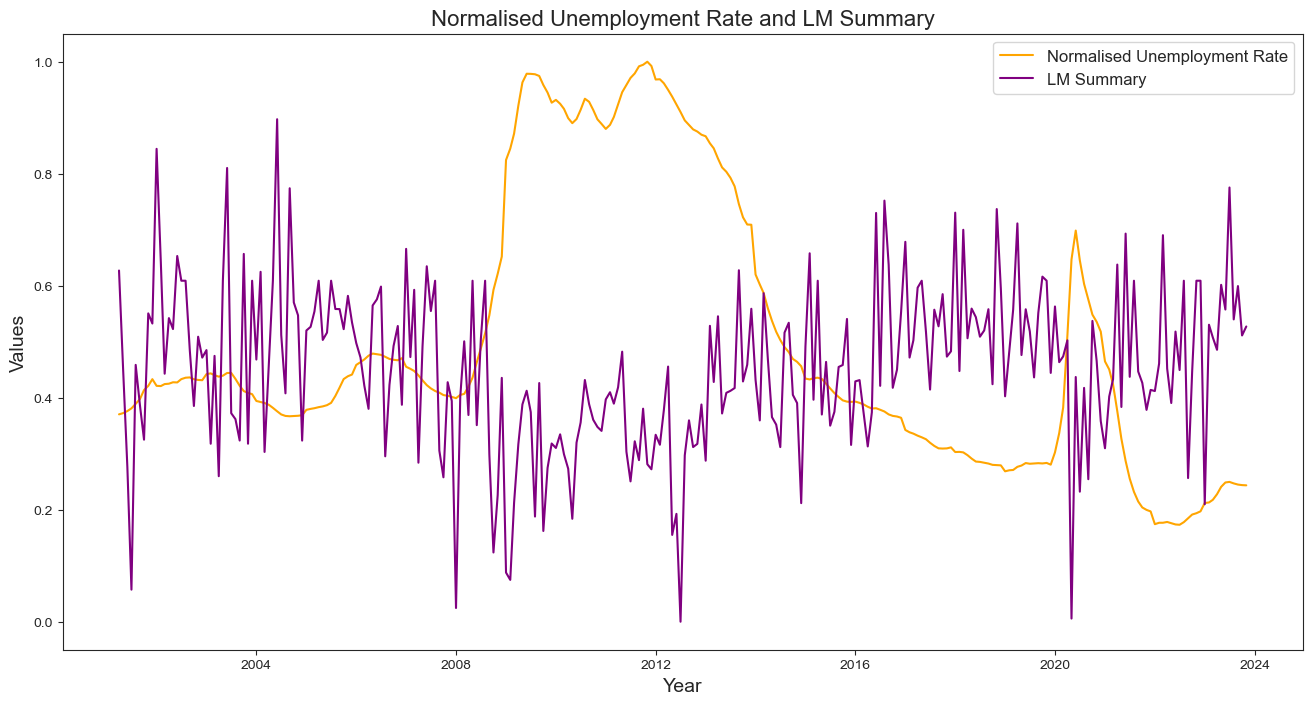

In [48]:
#Normalised Unemployment Rate and LM Over Time:

start_date = '2001-04'
end_date = '2023-11'

filtered_df = monthly_normalized[(monthly_normalized['ref_month'] >= start_date) & (monthly_normalized['ref_month'] <= end_date)]

plt.figure(figsize=(16, 8))
plt.plot(filtered_df['ref_month'], filtered_df['UnEmp/Vacancy'], label='Normalised Unemployment Rate', color='orange')
plt.plot(filtered_df['ref_month'], filtered_df['lm_summary'], label='LM Summary', color='purple') 
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14) 
plt.title('Normalised Unemployment Rate and LM Summary', fontsize=16)  
plt.legend(fontsize=12)  
plt.show()


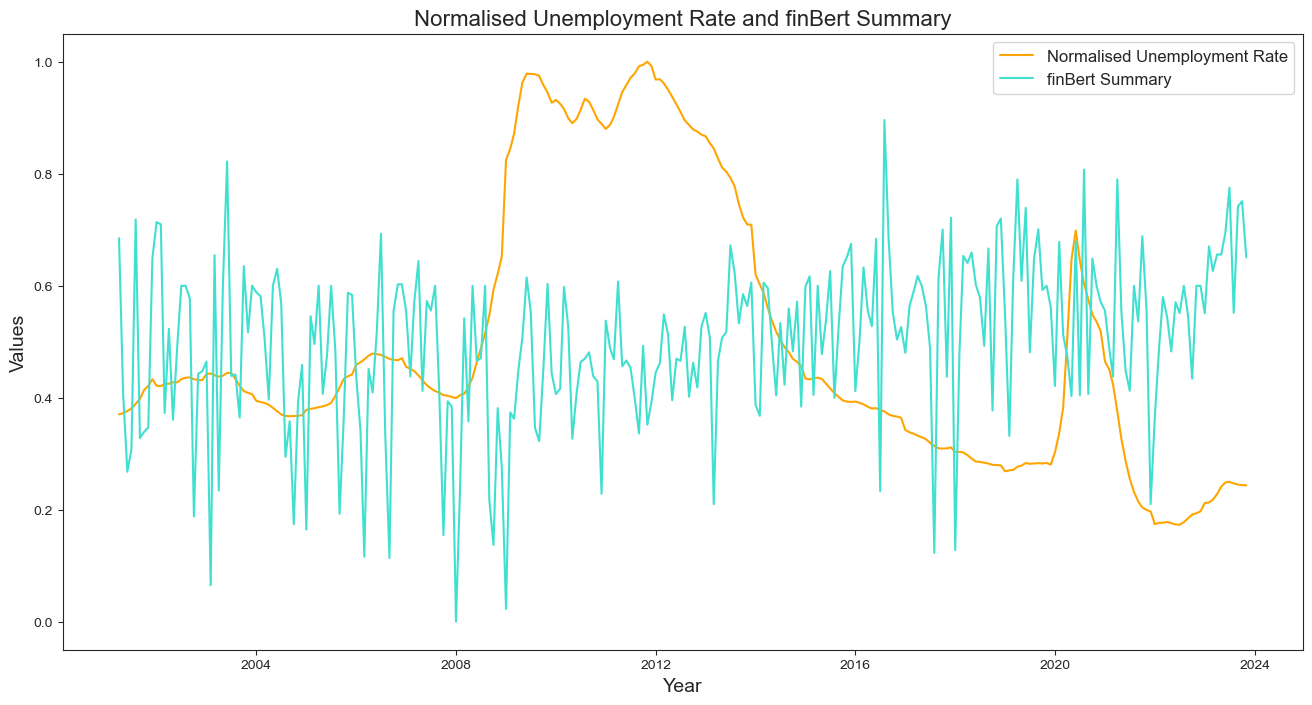

In [49]:
#Normalised Unemployment Rate and finBert Over Time:

start_date = '2001-04'
end_date = '2023-11'

filtered_df = monthly_normalized[(monthly_normalized['ref_month'] >= start_date) & (monthly_normalized['ref_month'] <= end_date)]

plt.figure(figsize=(16, 8))
plt.plot(filtered_df['ref_month'], filtered_df['UnEmp/Vacancy'], label='Normalised Unemployment Rate', color='orange')
plt.plot(filtered_df['ref_month'], filtered_df['finbert_summary'], label='finBert Summary', color='turquoise') 
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14) 
plt.title('Normalised Unemployment Rate and finBert Summary', fontsize=16)  
plt.legend(fontsize=12)  
plt.show()

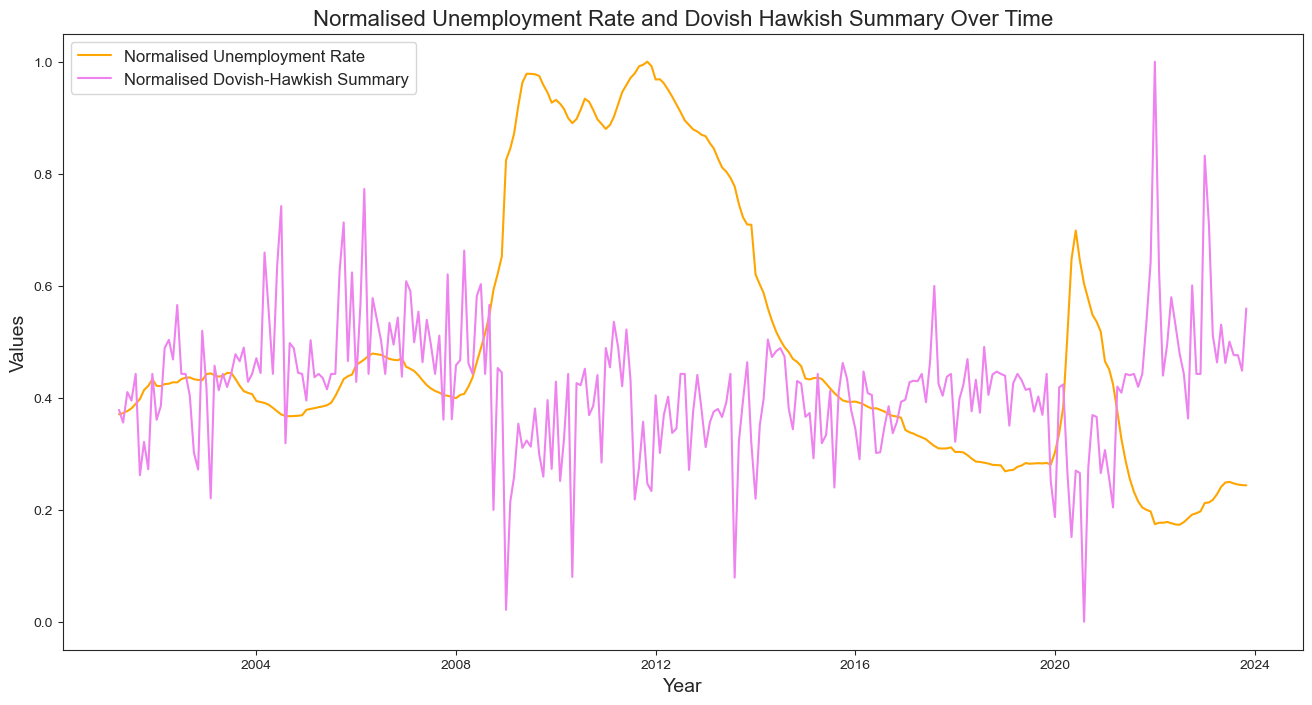

In [50]:
#Normalised Unemployment Rate and Dovish-Hawkish Summary Over Time:

start_date = '2001-04'
end_date = '2023-11'

filtered_df = monthly_normalized[(monthly_normalized['ref_month'] >= start_date) & (monthly_normalized['ref_month'] <= end_date)]

plt.figure(figsize=(16, 8))
plt.plot(filtered_df['ref_month'], filtered_df['UnEmp/Vacancy'], label='Normalised Unemployment Rate', color='orange')
plt.plot(filtered_df['ref_month'], filtered_df['dovish-hawkish-summary_flipped'], label='Normalised Dovish-Hawkish Summary', color='violet') 
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14) 
plt.title('Normalised Unemployment Rate and Dovish Hawkish Summary Over Time', fontsize=16)  
plt.legend(fontsize=12)  
plt.show()

We can make a tentative claim that when unemployment goes down, sentiment goes up and vice-versa, although it is clear from the visualisations that this is far from a perfectly correlated relationship. We can infer nothing about the direction of causation here, although we can note that there may be something about unemployment that means it is more reactive to sentiment (or vice-versa) and this could be an area for further exploration.

### 3.5.5 Conclusions

The most promising relationships between sentiment classifiers and the various indicators we looked at appear to be:

Bank rate decision metrics:

* dovish-hawkish_summary and MPC_RateDecided (0.28)
* finbert_summary and MPC_VotedDecrease (-0.25)
* lm_summary and MPC_RateDecided (0.25)

Economic indicators:

* lm_summary and UnEmp_Rate (-0.40)
* dovish_hawkish_summary and UnEmp_Rate (-0.29)

Financial market indicators:

* dovish_hawkish_summary and SONIA (0.32)
* dovish_hawkish_summary and GiltYield (0.26)
* dovish_hawkish_summary and EffectiveERI (0.26)
* lm_summary and SONIA (0.27)

There is no discernible correlation between sentiment and publication dates of Monetary Policy Reports and Financial Stability Reports. 

The relationship between sentiment and unemployment is of particular note, as the strongest correlations are seen here.

### 3.6 Do These Speeches Have Any Predictive Power To Assist In Predicting Market Behaviour?

To explore this question, we will focus on those indicators that have the most promising correlations with sentiment.

In each case, we will fit a linear regression model and display the scatterplot with regression line and summary statistics. First we build a class for this:

In [51]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [52]:
# Define a LinearRegr class to allow code re-use

class LinearRegr:
    def __init__(self, x, y, df):        
        self.x = x
        self.y = y
        self.df = df
        self.model = None
        
    def fitmodel(self):
        f = 'self.df[self.y] ~ self.df[self.x]'
        self.model = ols(f, data = self.df).fit()
    
    def showmodelsummary(self):
        print(self.model.summary())
        
    def showmodelparameters(self):
        # Extract the estimated parameters.
        print("Parameters: ", self.model.params)
        
    def showmodelstandarderrors(self):
        # Extract the estimated parameters.
        print("Standard errors: ", self.model.bse)
        
    def showmodelregressiontable(self):
        # Extract the estimated parameters.
        print("Predicted values: ", self.model.predict())  
 
    def showmodelregressionplot(self):        
        print(f'Correlation coefficient: {self.df[self.x].corr(self.df[self.y])}')
        # Set the X coefficient and the constant to generate the regression table.
        y_pred = (self.model.params[0]) +  self.model.params[1] * self.df[self.x]
        
        # View the output.
        print(y_pred)

        # Plot the graph with a regression line.
        plt.figure(figsize=(10,6))

        # Plot the data points with a scatterplot.
        plt.scatter(self.df[self.x], self.df[self.y], s=5)

        # Plot the regression line (in black).
        plt.plot(self.df[self.x], y_pred, color='black')

        # Set the x and y limits on the axes.
        plt.xlim(0)
        plt.ylim(0)
        
        # Set the title and x and y labels.
        plt.title(self.x + ' vs. ' + self.y)
        plt.xlabel(self.x)
        plt.ylabel(self.y)
        
        #Remove top and right spine
        sns.despine(top=True, right=True)

        # View the plot.
        plt.show()

Now we will run the analysis for the most promising relationships using the class we have just created:

Correlation coefficient: 0.27839828541525474
0      0.349969
1      0.349969
2      0.349969
3      0.349969
4      0.349969
         ...   
310    0.439457
311    0.470393
312    0.386096
313    0.368383
314    0.350165
Name: dovish-hawkish-summary_flipped, Length: 315, dtype: float64


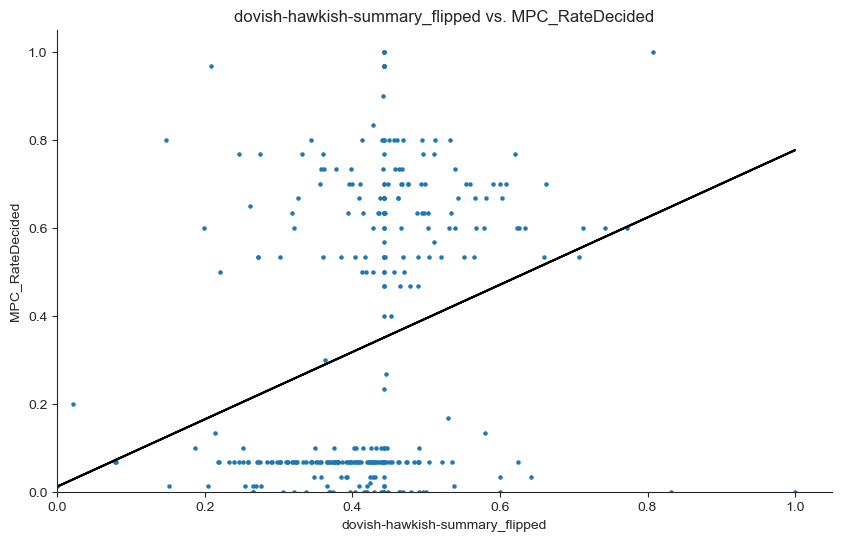

Parameters:  Intercept          0.011426
self.df[self.x]    0.764989
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        self.df[self.y]   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     26.30
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.14e-07
Time:                        11:49:33   Log-Likelihood:                -73.384
No. Observations:                 315   AIC:                             150.8
Df Residuals:                     313   BIC:                             158.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [53]:
corr_variables = ['dovish-hawkish-summary_flipped','MPC_RateDecided']
                  
lr = LinearRegr(corr_variables[0], corr_variables[1], monthly_normalized)
lr.fitmodel()
lr.showmodelregressionplot()
lr.showmodelparameters()
lr.showmodelsummary()

Correlation coefficient: 0.2629463146139043
0      0.537407
1      0.537407
2      0.537407
3      0.537407
4      0.537407
         ...   
310    0.611658
311    0.637325
312    0.567382
313    0.552686
314    0.537570
Name: dovish-hawkish-summary_flipped, Length: 315, dtype: float64


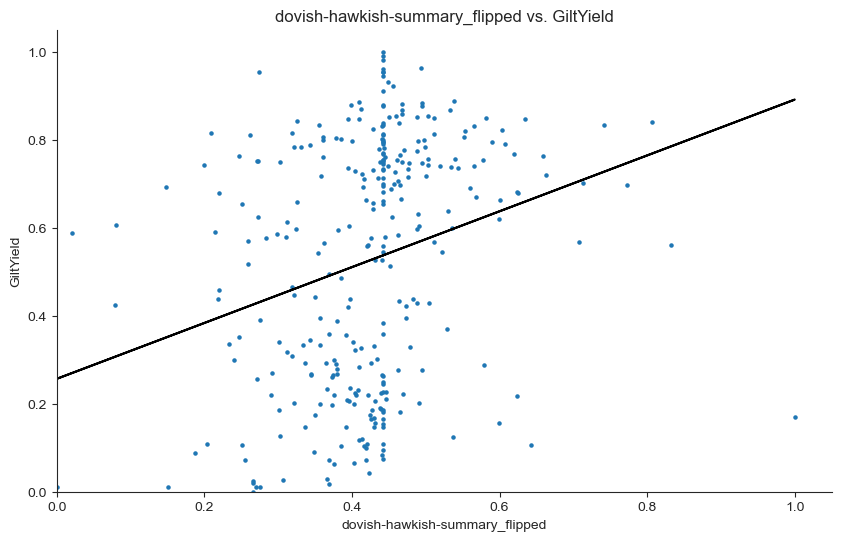

Parameters:  Intercept          0.256511
self.df[self.x]    0.634728
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        self.df[self.y]   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     23.25
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.23e-06
Time:                        11:49:33   Log-Likelihood:                -33.994
No. Observations:                 315   AIC:                             71.99
Df Residuals:                     313   BIC:                             79.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [54]:
corr_variables = ['dovish-hawkish-summary_flipped','GiltYield']
                  
lr = LinearRegr(corr_variables[0], corr_variables[1], monthly_normalized)
lr.fitmodel()
lr.showmodelregressionplot()
lr.showmodelparameters()
lr.showmodelsummary()

Correlation coefficient: 0.31971124844966364
0      0.354811
1      0.354811
2      0.354811
3      0.354811
4      0.354811
         ...   
310    0.456019
311    0.491006
312    0.395669
313    0.375636
314    0.355033
Name: dovish-hawkish-summary_flipped, Length: 315, dtype: float64


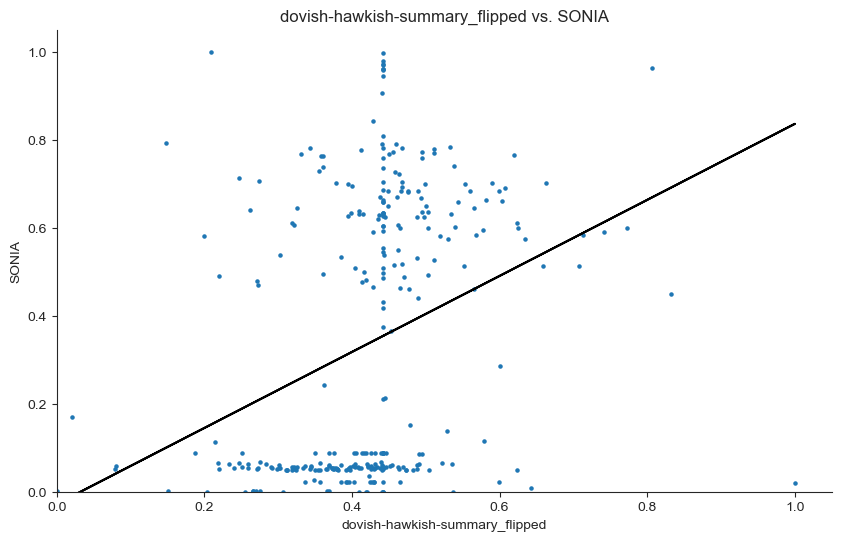

Parameters:  Intercept         -0.028070
self.df[self.x]    0.865177
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        self.df[self.y]   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     35.64
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           6.44e-09
Time:                        11:49:34   Log-Likelihood:                -64.291
No. Observations:                 315   AIC:                             132.6
Df Residuals:                     313   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [55]:
corr_variables = ['dovish-hawkish-summary_flipped','SONIA']
                  
lr = LinearRegr(corr_variables[0], corr_variables[1], monthly_normalized)
lr.fitmodel()
lr.showmodelregressionplot()
lr.showmodelparameters()
lr.showmodelsummary()

Correlation coefficient: -0.2854171613665336
0      0.647366
1      0.647366
2      0.647366
3      0.647366
4      0.647366
         ...   
310    0.599477
311    0.582923
312    0.628033
313    0.637512
314    0.647261
Name: dovish-hawkish-summary_flipped, Length: 315, dtype: float64


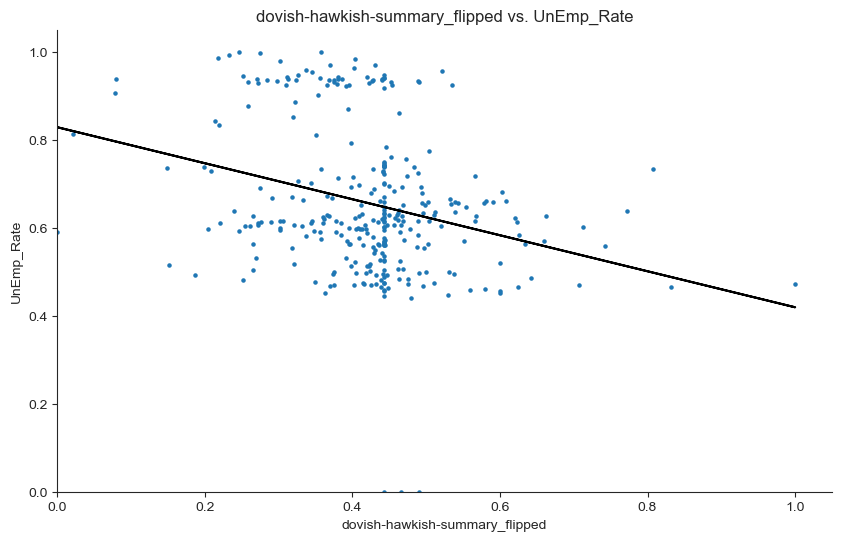

Parameters:  Intercept          0.828534
self.df[self.x]   -0.409376
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        self.df[self.y]   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.56e-07
Time:                        11:49:34   Log-Likelihood:                 132.08
No. Observations:                 315   AIC:                            -260.2
Df Residuals:                     313   BIC:                            -252.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [56]:
corr_variables = ['dovish-hawkish-summary_flipped','UnEmp_Rate']
                  
lr = LinearRegr(corr_variables[0], corr_variables[1], monthly_normalized)
lr.fitmodel()
lr.showmodelregressionplot()
lr.showmodelparameters()
lr.showmodelsummary()

Correlation coefficient: -0.40447351034887524
0      0.592697
1      0.592697
2      0.592697
3      0.592697
4      0.592697
         ...   
310    0.629096
311    0.636390
312    0.560891
313    0.583285
314    0.616752
Name: lm_summary, Length: 315, dtype: float64


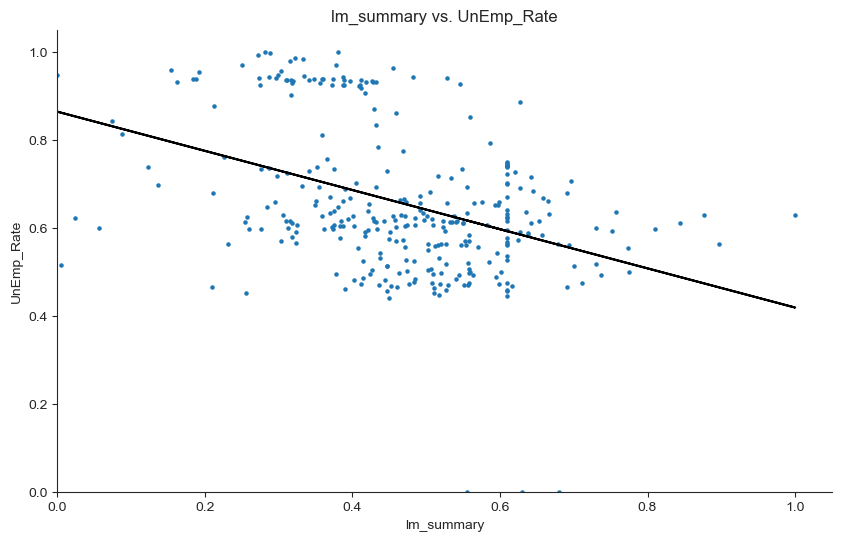

Parameters:  Intercept          0.863907
self.df[self.x]   -0.445385
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        self.df[self.y]   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     61.22
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           7.91e-14
Time:                        11:49:34   Log-Likelihood:                 146.84
No. Observations:                 315   AIC:                            -289.7
Df Residuals:                     313   BIC:                            -282.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [57]:
corr_variables = ['lm_summary','UnEmp_Rate']
                  
lr = LinearRegr(corr_variables[0], corr_variables[1], monthly_normalized)
lr.fitmodel()
lr.showmodelregressionplot()
lr.showmodelparameters()
lr.showmodelsummary()

Here is a summary of the R Squared values from the above computations:

* Predicting MPC Rate Using Dovish-Hawkishness: R Squared: 0.08
* Predicting Gilt Yields Using Dovish-Hawkishness: R Squared: 0.07
* Predicting SONIA Using Dovish-Hawkishness: R Squared: 0.10
* Predicting Unemployment Rate Using Dovish-Hawkishness: R-Squared:  0.08 
* Predicting Unemployment Rate Using LM: R-Squared:  0.16

### 3.6.1 Conclusions

Using a univariation linear regression model, our analysis yielded small R-Squared values, suggesting that sentiment has modest potential to predict these selected market indicators. 

However, we note that identifying causal relationships is very challenging because of the interconnected nature of Bank of England decision making and speeches, and financial/economic trends and behaviour of other economic agents. In this context, it is conceivable that sentiment could contribute some predictive cabablity in a multivariate model and this is a recommended area for further exploration. 

As outlined in our Final Presentation, sentiment fluctuates over time and, generally speaking, significant events that have had a negative impact on the world economy seem to lead to periods where sentiment becomes more negative (the below is a screen grab from our presenation): 

## 4. Insights & Recommendations

The client asked us to consider two other questions:

5. Are There Other Insights Or Findings From the Analysis That May Be of Interest To The Organisation?
<br>
<br>
6. What Are The Potential Reasons For Any Of The Correlations Discovered Above? How Have You Drawn These Conclusions?

These questions are answered in both the project report and the final presentation to the client. What follows here is a brief summary of our key insights and recommedations.

### 4.1 Key Insights

**Sentiment Over Time**: 
* Fluctuates, cyclically: degree depends on classifier
* dovishness may track with negative sentiment (this is tentative a needs further exploration)


**Correlations**: 
* No strong correlations, but candidates for further exploration

**Predicting Financial Markets**:
* Linear regression shows some modest potential (e.g. LM accounts for 16% of variance in unemp. rate) 

**Other**:
* Analysis yielded good data that is ripe for mining and can be developed further

### 4.2 Recommendations

**Sentiment Over Time:** 
* Focus on more sophisticated NLP models (rather than Vader/Textblob): more likely to detect fluctuations
* Use dovish-hawkish classifier for ongoing analysis (and note dovish seems to track with more negative sentiment)

**Predicting Financial Markets:**
* Use dovish-hawish for MPC Decisions, Unemployment Rate, Gilt Yield, SONIA, Effective ERI
* LM: Uemp, SONIA, MPC Decisions
* finBert: Unemp, MPC Decisions (Decrease)

**Other:**
* Supplement our rich data set by adding any data from comms regarding the reach/coverage of each speech (e.g. website clicks)
